---
### NBA Oyuncu Performans Analizi (2013-2014 Sezonu)

#### 📌 Giriş

Bu çalışma, **2013-2014 NBA sezonunda** en az 40 maça çıkmış basketbolcuların performanslarını değerlendiren kapsamlı bir veri seti üzerinden yürütülmektedir. Analizimiz, sezonun En Değerli Oyuncusu (EDO) olarak seçilen **Kevin Durant** ve diğer seçkin oyuncuların performans göstergelerini derinlemesine inceler. Bu göstergeler, oyuncuların sezon boyunca sergiledikleri performansın boyutlarını ve kalitesini anlamamıza yardımcı olacak detaylı değişkenlerle zenginleştirilmiştir.

#### 📊 Bağımlı Değişken

- **PER (Oyuncu Verimlilik Derecesi):** Oyuncunun dakika başına üretkenliğini ölçen, lig ortalaması 15 olacak şekilde standardize edilmiş bir göstergedir. PER, oyuncunun sahadaki etkinliğinin ve katkısının önemli bir ölçütüdür.

#### 📈 Açıklayıcı Değişkenler

Aşağıdaki değişkenler, oyuncuların performansını detaylı bir şekilde analiz etmemize olanak tanır:

- **Player:** Basketbolcu isimleri.
- **Age:** 1 Şubat 2014 itibarıyla oyuncunun yaşı.
- **Games:** Bir oyuncunun oynadığı maç sayısı.
- **Minutes:** Bir oyuncunun sahada geçirdiği süre.
- **TS% (Isabetli Atış Yüzdesi):** 2 sayılık, 3 sayılık ve serbest atışları içeren, atış verimliliğini gösteren bir ölçüt.
- **ORB / DRB / TRB:** Sırasıyla ofansif, defansif ve toplam ribaund yüzdesi.
- **AST:** Asist yüzdesi.
- **STL:** Top çalma yüzdesi.
- **BLK:** Blok yüzdesi.
- **TOV:** Top kaybı yüzdesi.
- **USG%:** Topa sahip olma yüzdesi.
- **ORtg / DRtg:** Sırasıyla 100 ofansif / defansif atakta atılan sayı yüzdesi.
- **OWS / DWS:** Atak ve defansta kazandırılan galibiyet sayısına katkı.
- **WS:** Kazanma yüzdesi.

#### 🎯 Araştırmanın Amacı

Bu analizle, **NBA'de 2013-2014 sezonunda** sahne alan basketbolcuların detaylı performans göstergeleri üzerinden üstün başarı gösteren oyuncuları belirlemeyi hedefliyoruz. Oyuncuların sahadaki etkilerinin objektif verilerle değerlendirilmesi ve bu performansların takımlarının genel başarısına olan katkılarının derinlemesine analiz edilmesi ana amacımızdır.

---

---
### 📊 Veri Seti
---

- https://www.statcrunch.com/app/index.html?dataid=1096769&groupid=958

---
### 📚 Gerekli Kütüphanelerin Yüklenmesi
---

In [38]:
# Veri Manipülasyonu
import numpy as np
import pandas as pd

# Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

# Önişleme ve Model Seçimi
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, scale

# Modeller
from sklearn.linear_model import ElasticNetCV
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBRegressor

# Model Değerlendirme Metrikleri
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# İstatistiksel Testler
from scipy.stats import levene
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Miscellaneous
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---
### 📊 Veri Setinin İçe Aktarılması
---

In [2]:
data = pd.read_excel("./datasets/NBA.xlsx")

---
### 🔍 Gelişmiş Fonksiyonel Keşifçi Veri Analizi (Advanced Functional EDA) 🚀
Veri setimizin derinlemesine analizine giriş yapıyoruz, önemli öngörüler elde etmeyi hedefliyoruz.
#### 🌍 1. Genel Resim
Veri setimizin genel yapısı ve temel istatistiklerine genel bir bakış.
#### 📊 2. Kategorik Değişken Analizi 
Kategorik değişkenlerin dağılımı ve hedef değişkenle ilişkileri üzerine odaklanma.
#### 🔢 3. Sayısal Değişken Analizi 
Sayısal değişkenlerin temel istatistikleri ve veri setindeki rollerinin incelenmesi.
#### 🎯 4. Hedef Değişken Analizi 
Hedef değişkenin incelemesi, dağılımı ve diğer değişkenlerle ilişkisi.
#### 🔗 5. Korelasyon Analizi 
Değişkenler arası ilişkilerin ve hedef değişken üzerindeki etkilerinin keşfi.

---

---
### 🌍1. Genel Resim
---

In [3]:
def check_df(dataframe, head=5):
    print("\n" + "#" * 50 + " Shape " + "#" * 50)
    print(f"📏 Rows: {dataframe.shape[0]}, Columns: {dataframe.shape[1]}")

    print("\n" + "#" * 50 + " Types " + "#" * 50)
    print("🔤" + "\n" + str(dataframe.dtypes))

    print("\n" + "#" * 50 + " Head " + "#" * 50)
    print("🔝" + "\n" + str(dataframe.head(head)))

    print("\n" + "#" * 50 + " Tail " + "#" * 50)
    print("🔚" + "\n" + str(dataframe.tail(head)))

    print("\n" + "#" * 50 + " Missing Values " + "#" * 50)
    missing_values = dataframe.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if len(missing_values) > 0:
        print("❗" + "\n" + str(missing_values))
    else:
        print("✅ No missing values.")

    print("\n" + "#" *50 + " Quantiles " + "#" * 50)
    print("📊" + "\n" + str(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T))
    
check_df(data)


################################################## Shape ##################################################
📏 Rows: 342, Columns: 21

################################################## Types ##################################################
🔤
Player       object
Position     object
Age           int64
Team         object
Games         int64
Minutes       int64
PER         float64
TS          float64
ORB         float64
DRB         float64
             ...   
AST         float64
STL         float64
BLK         float64
TOV         float64
USG         float64
ORtg          int64
DRtg          int64
OWS         float64
DWS         float64
WS          float64
Length: 21, dtype: object

################################################## Head ##################################################
🔝
             Player Position  Age Team  Games  Minutes    PER    TS    ORB    DRB    TRB    AST   STL   BLK    TOV    USG  ORtg  DRtg    OWS   DWS     WS
0      Kevin Durant       SF   25  OKC     81

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 342
Variables: 21
cat_cols: 1
num_cols: 18
cat_but_car: 2
num_but_cat: 0


---
### 📊 2. Kategorik Değişken Analizi
---

       Position  Ratio
PF           73 21.345
SF           71 20.760
SG           70 20.468
PG           63 18.421
C            61 17.836
SG-PG         1  0.292
SG-SF         1  0.292
PF-SF         1  0.292
SF-PF         1  0.292
----------------------------------------------------------------------------------------------------


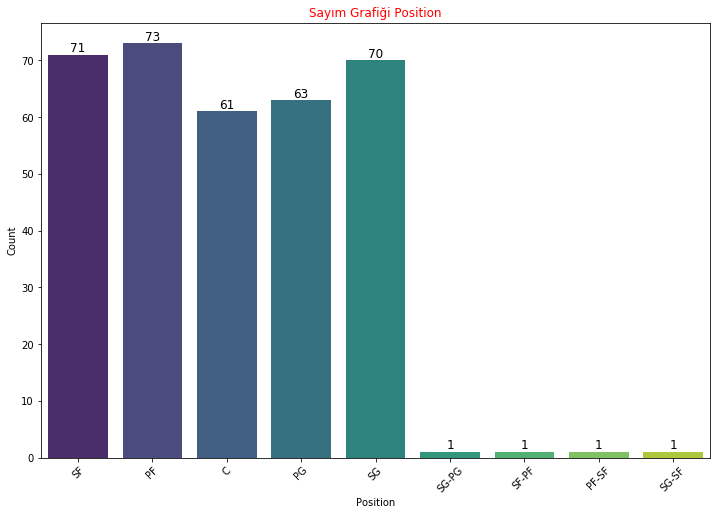

In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    print("-" * 100)

    if plot:
        plt.figure(figsize=(12, 8))
        ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette="viridis")
        plt.title(f'Sayım Grafiği {col_name}', color='red')  
        plt.xlabel(f'{col_name}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        for p in ax.patches: 
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                    fontsize=12, ha='center', va='bottom')
        

for col in cat_cols:
    cat_summary(data, col, plot=True)

---
### 🔢 3. Sayısal Değişken Analizi
---

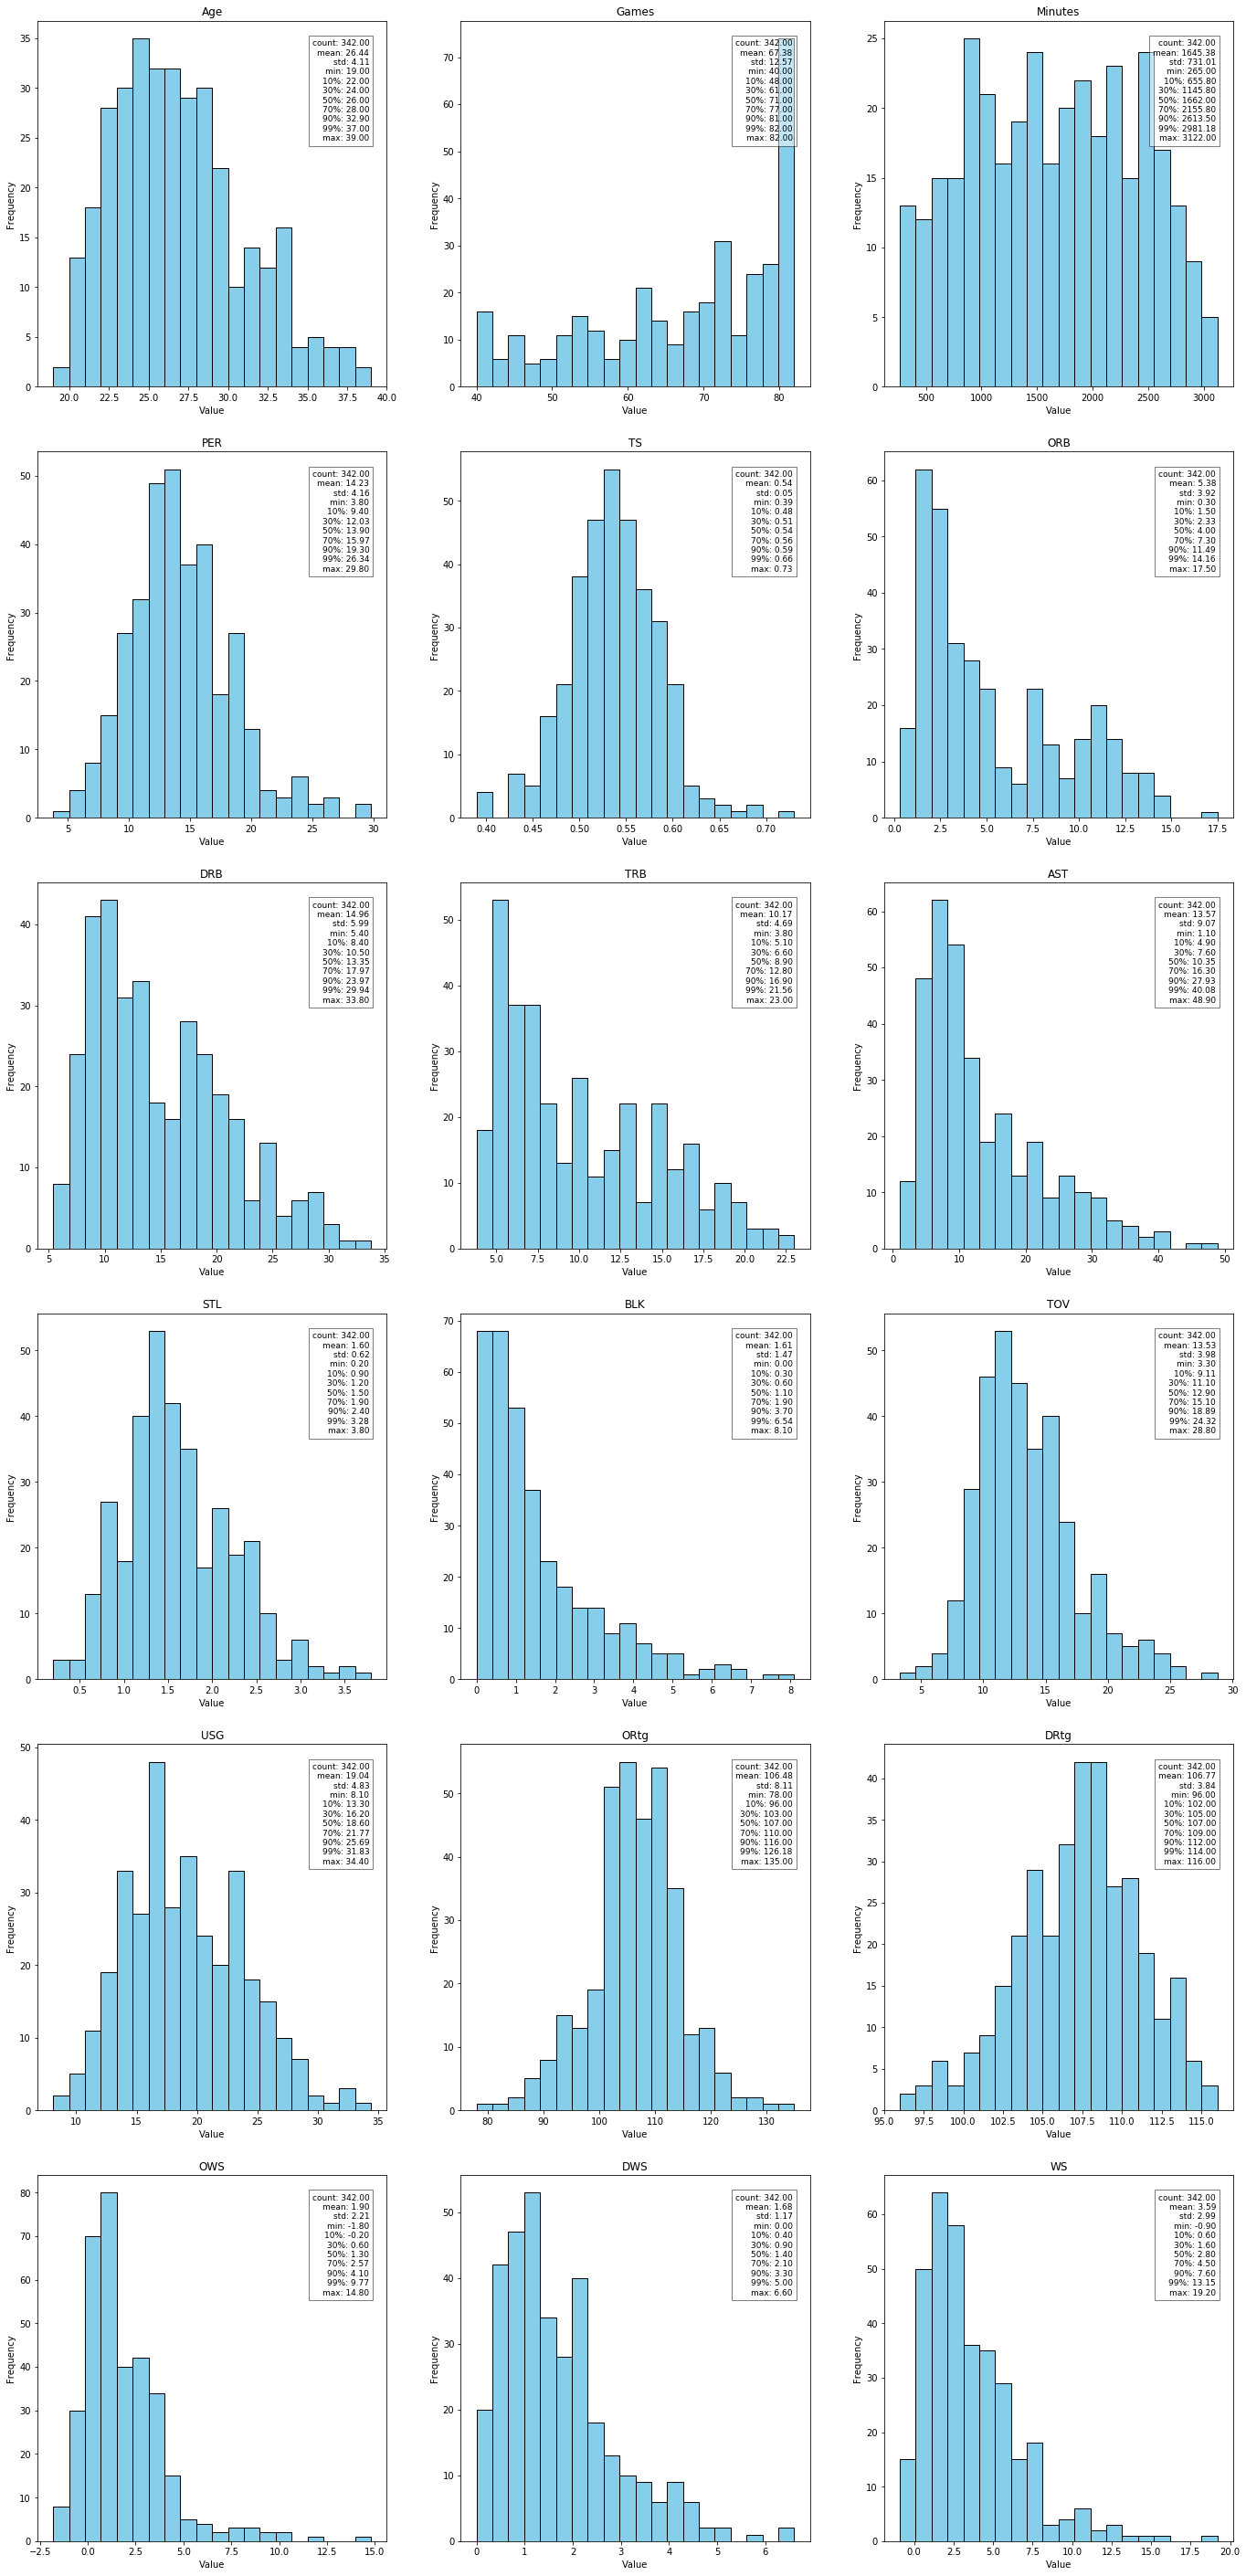

In [6]:
def num_summary(dataframe, numerical_cols, plot=False):
    quantiles = [0.10, 0.30, 0.50, 0.70, 0.90, 0.99]
    
    if plot:
        fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))
        fig.tight_layout(pad=5.0)
        
        for col, ax in zip(numerical_cols, axes.flatten()):
            stats = dataframe[col].describe(quantiles)
            ax.hist(dataframe[col].dropna(), bins=20, color='skyblue', edgecolor='black')
            ax.set_title(col)
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')
            stats_text = '\n'.join([f'{idx}: {value:.2f}' for idx, value in stats.iteritems()])
            ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', 
                    horizontalalignment='right', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
        plt.show()
    else:
        for col in numerical_cols:
            stats = dataframe[col].describe(quantiles)
            print(stats)


num_summary(data, num_cols, plot=True)

---
### 🎯 4. Hedef Değişken Analizi
---

Position Kategorisine Göre PER Ortalamaları:
Position  TARGET_MEAN
      C       15.790
     PF       15.360
  PF-SF        8.300
     PG       14.510
     SF       12.810
  SF-PF       11.500
     SG       13.100
  SG-PG       14.100
  SG-SF        7.800


----------------------------------------------------------------------------------------------------


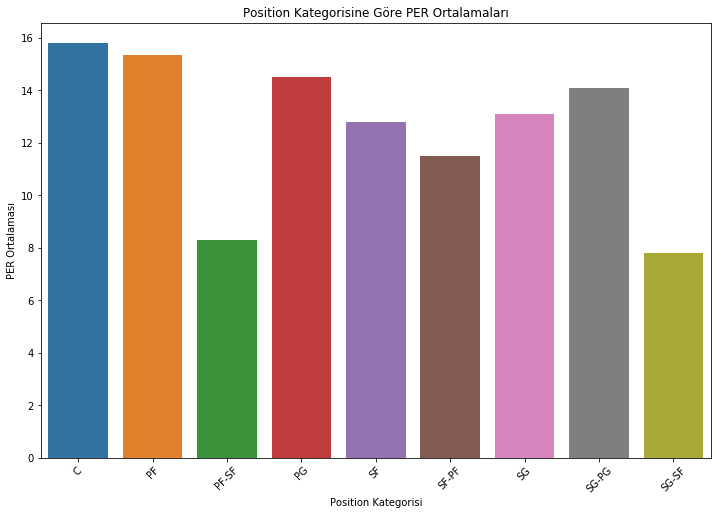

In [7]:
def target_summary_with_cat(dataframe, target, categorical_col):
    summary_df = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}).reset_index()
    summary_df = summary_df.round(2)  
    summary_df[categorical_col] = summary_df[categorical_col].astype(str)  

    print(f"{categorical_col} Kategorisine Göre {target} Ortalamaları:")
    print(summary_df.to_string(index=False), end="\n\n\n")
    print("-" * 100)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=categorical_col, y="TARGET_MEAN", data=summary_df)
    plt.xticks(rotation=45)
    plt.title(f"{categorical_col} Kategorisine Göre {target} Ortalamaları")  # Buradaki argüman kaldırıldı
    plt.xlabel(f"{categorical_col} Kategorisi")
    plt.ylabel(f"{target} Ortalaması")
    plt.show()
    

for col in cat_cols:
    target_summary_with_cat(data, "PER", col)

---
### 🔗 5. Korelasyon Analizi
---

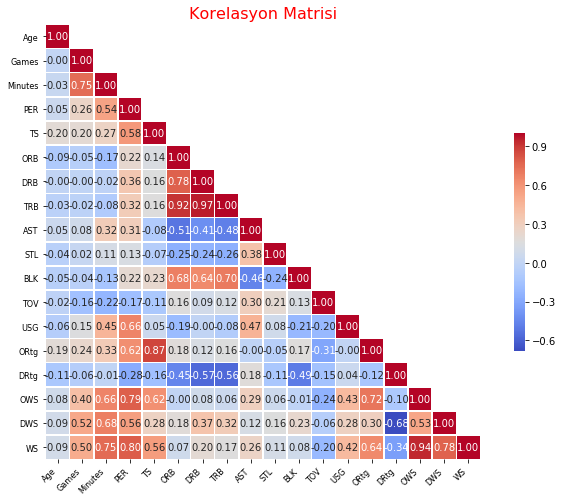

Yüksek korelasyona sahip sütun çiftleri (0.9 üzeri):
  Sütun 1 Sütun 2  Korelasyon Değeri
0     ORB     TRB              0.917
1     DRB     TRB              0.966
2     OWS      WS              0.943


In [8]:

def high_correlated_cols_df(dataframe, corr_th=0.90, figsize=(12, 8)):
    """
    Veri çerçevesinin korelasyon matrisini çizer ve korelasyon değerlerini ısı haritası üzerinde sayısal olarak gösterir.
    Aynı zamanda, belirlenen korelasyon eşiğini aşan sütun çiftlerini ve bu çiftlerin korelasyon değerlerini içeren bir DataFrame döndürür.

    Parameters:
    dataframe (pd.DataFrame): Analiz edilecek veri çerçevesi.
    corr_th (float): Yüksek korelasyon eşiği (varsayılan 0.90).
    figsize (tuple): Figür boyutu (varsayılan (10, 8)).

    Returns:
    pd.DataFrame: Eşiği aşan korelasyonlara sahip sütun çiftleri ve korelasyon değerleri.
    """
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
    upper_triangle_matrix = corr.where(mask)

    # Korelasyon eşiğini aşan değerleri içeren çiftleri bul
    high_corr_pairs = [(i, j, upper_triangle_matrix.loc[i,j]) for i in upper_triangle_matrix.columns for j in upper_triangle_matrix.columns if upper_triangle_matrix.loc[i,j] > corr_th]

    # Çizim yap
    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.ylim(len(corr), 0)
    plt.title("Korelasyon Matrisi", fontsize=16, color = 'red')
    plt.xticks(fontsize=8, rotation=45, ha="right")
    plt.yticks(fontsize=8)
    plt.show()

    if len(high_corr_pairs) == 0:
        print("Yüksek korelasyona sahip sütun çifti bulunamadı.")
        return pd.DataFrame()
    else:
        high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Sütun 1', 'Sütun 2', 'Korelasyon Değeri'])
        print(f"Yüksek korelasyona sahip sütun çiftleri ({corr_th} üzeri):\n{high_corr_df}")
        return high_corr_df
    
drop_list = high_correlated_cols_df(dataframe=data)

---
### 🎮 Oyuncu Analizi
---

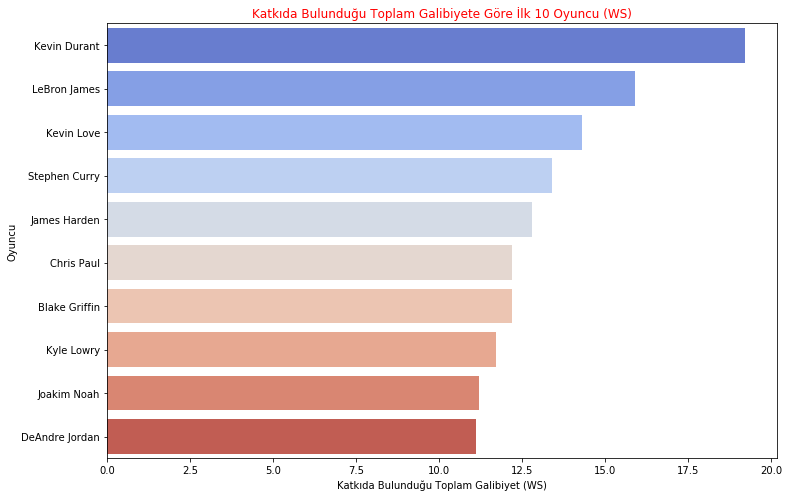

In [9]:
# Oyuncuların Toplam Kazandırdığı Maç Sayısına (WS) Göre Sıralaması
ws_sorted = data.sort_values('WS', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='WS', y='Player', data=ws_sorted, palette='coolwarm')
plt.title('Katkıda Bulunduğu Toplam Galibiyete Göre İlk 10 Oyuncu (WS)', color = 'red')
plt.xlabel('Katkıda Bulunduğu Toplam Galibiyet (WS)')
plt.ylabel('Oyuncu')
plt.show()

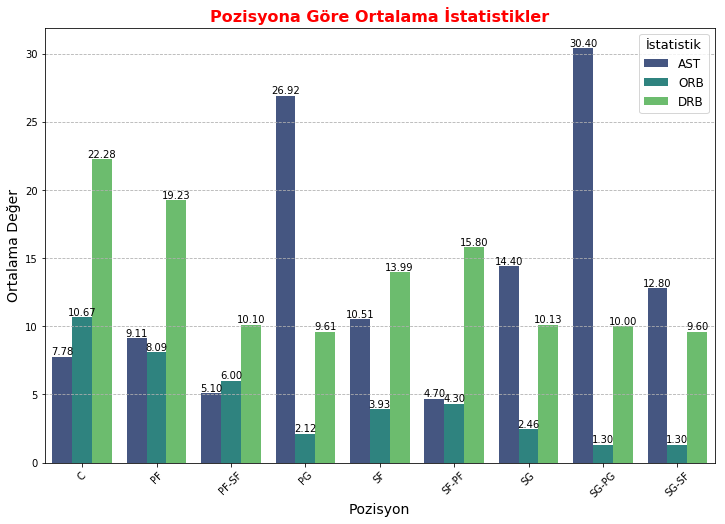

In [12]:
position_stats = data.groupby('Position').mean()
selected_stats = position_stats[['AST', 'ORB', 'DRB']]

selected_stats_long = selected_stats.reset_index().melt(id_vars='Position', var_name='Statistic', value_name='Average')
plt.figure(figsize=(12, 8))
sns.barplot(data=selected_stats_long, x='Position', y='Average', hue='Statistic', palette='viridis')
plt.title('Pozisyona Göre Ortalama İstatistikler', fontsize=16, fontweight='bold', color = 'red')
plt.ylabel('Ortalama Değer', fontsize=14)
plt.xlabel('Pozisyon', fontsize=14)
plt.legend(title='İstatistik', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(axis='y', linestyle='--')

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.show()

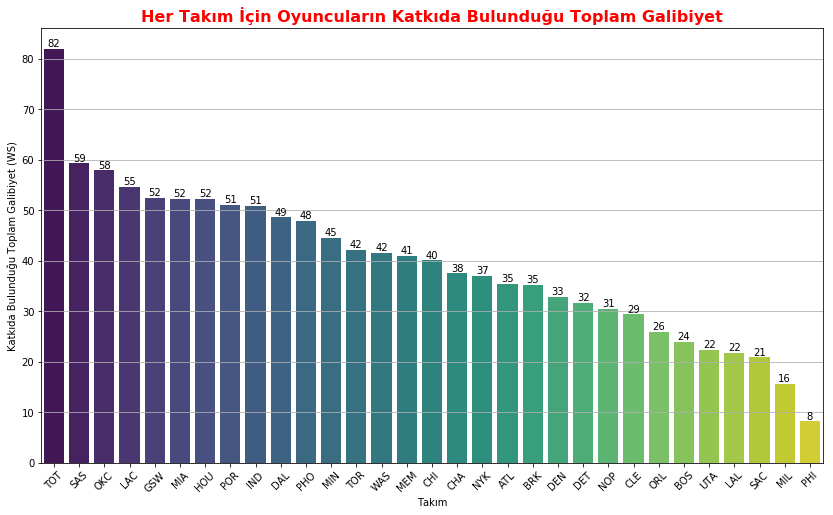

In [11]:
# Takım Bazında Oyuncu Katkıları
team_ws = data.groupby('Team')['WS'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
palette = sns.color_palette("viridis", len(team_ws))
sns.barplot(x=team_ws.index, y=team_ws.values, palette=palette)
plt.title('Her Takım İçin Oyuncuların Katkıda Bulunduğu Toplam Galibiyet', fontsize=16, fontweight='bold', color = 'red')
plt.xlabel('Takım')
plt.ylabel('Katkıda Bulunduğu Toplam Galibiyet (WS)')
plt.xticks(rotation=45)
plt.grid(axis='y')

for index, value in enumerate(team_ws):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

plt.show()

---
### 🚫 Aykırı Değer Analizi
---

In [13]:
num_cols1 = data.select_dtypes(include=['float64', 'int64']).columns

# Aykırı gözlemleri IQR yöntemiyle belirleme
Q1 = data[num_cols1].quantile(0.25)
Q3 = data[num_cols1].quantile(0.75)
IQR = Q3 - Q1

outliers_numeric = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
outlier_summary_numeric = outliers_numeric.sum().sort_values(ascending=False)
filtered_outliers_summary = outlier_summary_numeric[outlier_summary_numeric > 0]
outlier_summary_str = "\n".join([f"{index}: {value} Aykırı Değer" for index, value in filtered_outliers_summary.items()])

print("Aykırı Değer Analizi Sonuçları:\n")
print(outlier_summary_str)

Aykırı Değer Analizi Sonuçları:

BLK: 16 Aykırı Değer
OWS: 14 Aykırı Değer
WS: 13 Aykırı Değer
TOV: 12 Aykırı Değer
PER: 11 Aykırı Değer
ORtg: 10 Aykırı Değer
DWS: 9 Aykırı Değer
AST: 9 Aykırı Değer
TS: 8 Aykırı Değer
STL: 4 Aykırı Değer
DRB: 2 Aykırı Değer
DRtg: 2 Aykırı Değer
USG: 1 Aykırı Değer
ORB: 1 Aykırı Değer
Age: 1 Aykırı Değer


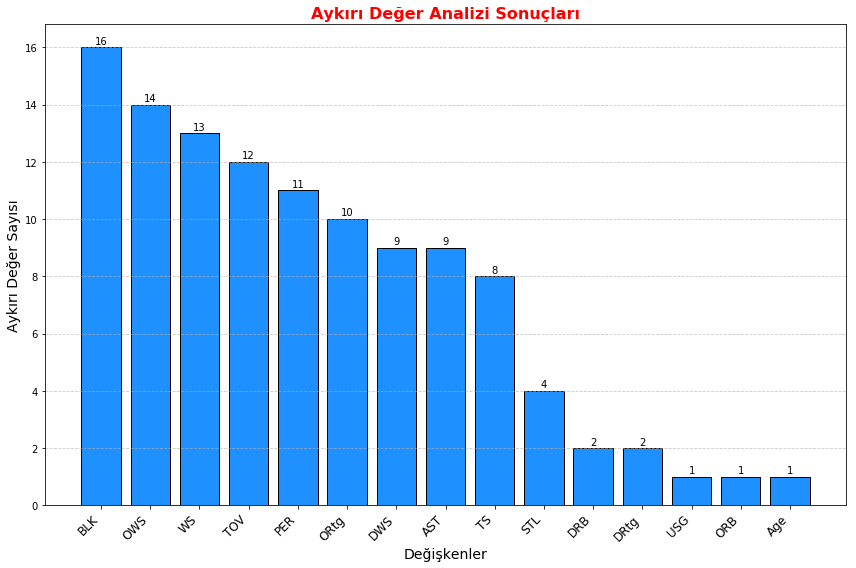

In [14]:
# Aykırı Değer Analizi Sonuçlarını Çubuk Grafiği ile Görselleştirme
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_outliers_summary.index, filtered_outliers_summary.values, color='dodgerblue', edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .05, yval, ha='center', va='bottom')

plt.xlabel('Değişkenler', fontsize=14)
plt.ylabel('Aykırı Değer Sayısı', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title('Aykırı Değer Analizi Sonuçları', fontsize=16, fontweight='bold', color='red')
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

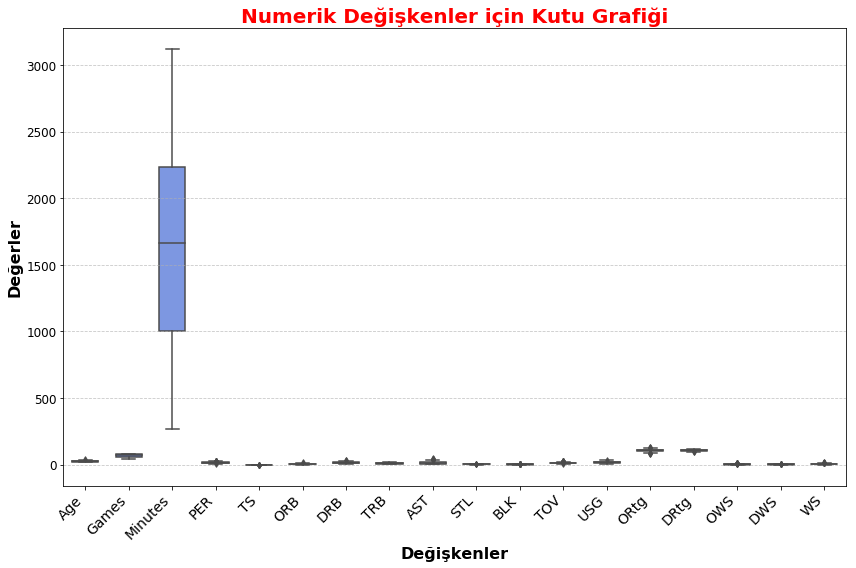

In [15]:
# Kutu Grafiği ile Aykırı Gözlem Analizi
num_cols_df = data[num_cols]
plt.figure(figsize=(12, 8))
sns.boxplot(data=num_cols_df, palette="coolwarm", width=0.6, fliersize=4, linewidth=1.5)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Değişkenler', fontsize=16, fontweight='bold')
plt.ylabel('Değerler', fontsize=16, fontweight='bold')
plt.title('Numerik Değişkenler için Kutu Grafiği', fontsize=20, fontweight='bold', color='red')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

---
### 🔍Çok Değişkenli Aykırı Gözlem Analizi
---

- **Local Outlier Factor (LOF)**, gözlemleri bulundukları konumda yoğunluk tabanlı olarak skorlayarak aykırı değerleri tanımlamamıza olanak sağlar.

- Bir noktanın lokal yoğunluğu, bu noktanın komşuları ile karşılaştırılarak belirlenir. Eğer bir nokta, komşularının yoğunluğundan anlamlı şekilde düşük ise, bu nokta komşularından daha seyrek bir bölgede bulunuyor demektir. Bu durumda bir komşuluk yapısı gözlemlenir.

- Bir değerin çevresi yoğun değilse, bu değer aykırı bir değer olarak değerlendirilir.

In [16]:
def detect_outliers(data, num_cols):
    """
    Veri setindeki sayısal sütunlar için aykırı değerleri tespit eder.
    Aykırı değerleri ve normal değerleri sayar, aykırı değer içeren gözlemleri döndürür.

    Parametreler:
    - data (pd.DataFrame): İşlenecek veri seti.
    - num_cols (list): Aykırı değer tespiti yapılacak sayısal sütunların isimleri.

    Döndürülen Değerler:
    - outlier_count (int): Aykırı değer sayısı.
    - normal_count (int): Normal değer sayısı.
    - outliers_df (pd.DataFrame): Aykırı değer içeren gözlemler.
    """
    # Aykırı değer tespiti
    numeric_data = data[num_cols]
    lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    data['Outlier'] = lof.fit_predict(numeric_data)

    # Aykırı ve normal değer sayıları
    outlier_count = (data['Outlier'] == -1).sum()
    normal_count = (data['Outlier'] == 1).sum()

    # Aykırı değer içeren gözlemler
    outliers_df = data[data['Outlier'] == -1]

    return outlier_count, normal_count, outliers_df


outlier_count, normal_count, outliers_df = detect_outliers(data, num_cols)

print(f"Toplam {outlier_count} aykırı değer bulundu. ")
print(f"Veri setindeki toplam oyuncu sayısına oranı: {outlier_count / (outlier_count + normal_count):.2%}")
print("-" * 100)
print("\nAykırı Değer Olarak Belirlenen Oyuncular:")
print(outliers_df.T)


Toplam 1 aykırı değer bulundu. 
Veri setindeki toplam oyuncu sayısına oranı: 0.29%
----------------------------------------------------------------------------------------------------

Aykırı Değer Olarak Belirlenen Oyuncular:
                     0
Player    Kevin Durant
Position            SF
Age                 25
Team               OKC
Games               81
Minutes           3122
PER             29.800
TS               0.635
ORB              2.200
DRB             18.600
...                ...
STL              1.700
BLK              1.500
TOV             12.200
USG             33.000
ORtg               123
DRtg               104
OWS             14.800
DWS              4.400
WS              19.200
Outlier             -1

[22 rows x 1 columns]


---
### 🧮 Çoklu Linear Regresyon
---

In [17]:
# Hedef Değişkenler ve Bağımsız Değişkenler
X = data.drop(['Player', 'Position', 'Team', 'PER'], axis=1)
y = data['PER']

In [18]:
# Train ve Test Olarak Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 53)

In [19]:
# Stats paketi ile Model Kurmak
model_stats = sm.OLS(y_train, X_train).fit()

In [20]:
# Model çıktısı
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PER   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7026.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          1.19e-293
Time:                        15:06:33   Log-Likelihood:                -228.24
No. Observations:                 239   AIC:                             492.5
Df Residuals:                     221   BIC:                             555.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0126      0.012      1.088      0.278      -0.010       0.035
Games         -0.0119      0.006     -2.059      0.041      -0.023      -0.001
Minutes        0.0008      0.000      4.789      0.000       0.000       0.001
TS            21.9023      3.429      6.388      0.000      15.145      28.659
ORB            0.6350      0.202      3.149      0.002       0.238       1.032
DRB            0.4714      0.200      2.356      0.019       0.077       0.866
TRB           -0.7489      0.405     -1.850      0.066      -1.547       0.049
AST            0.1502      0.014     11.081      0.000       0.123       0.177
STL            0.9692      0.086     11.253      0.000       0.799       1.139
BLK            0.5010      0.043     11.622      0.000       0.416       0.586
TOV           -0.1933      0.029     -6.725      0.000      -0.250      -0.137
USG            0.3655      0.018     19.944      0.000       0.329       0.402
ORtg           0.0589      0.025      2.328      0.021       0.009       0.109
DRtg          -0.1444      0.013    -10.703      0.000      -0.171      -0.118
OWS           -0.5003      0.896     -0.558      0.577      -2.266       1.266
DWS           -1.3769      0.897     -1.535      0.126      -3.144       0.390
WS             0.8781      0.889      0.988      0.324      -0.874       2.630
Outlier       -0.6327      0.375     -1.685      0.093      -1.373       0.107
==============================================================================
Omnibus:                        1.503   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.213
Skew:                           0.069   Prob(JB):                        0.545
Kurtosis:                       3.321   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-kare ve Düzeltilmiş R-kare değerleri `0.998`, yani modelin PER'i açıklama yeteneği çok yüksek. F-istatistiği `7378` ve ilgili p-değeri çok küçük, bu da modelin istatistiksel olarak anlamlı olduğunu gösteriyor. 

- Her bir bağımsız değişkenin katsayısı (`coef`), standart hatası (`std err`), t-istatistiği ve p-değeri bulunuyor. 

  - `Age` ve `Games` değişkenleri istatistiksel olarak anlamlı değil (p>0.05). 
  - `Minutes`, `TS` (muhtemelen True Shooting yüzdesi), `ORB` (Offensive Rebounds), `DRB` (Defensive Rebounds), `AST` (Assists), `STL` (Steals), `BLK` (Blocks), `USG` (Usage Rate), `ORtg` (Offensive Rating) ve `DRtg` (Defensive Rating) gibi değişkenler istatistiksel olarak anlamlı (p<0.05).


- Modelin diğer diagnostik ölçütleri (Omnibus, Durbin-Watson, Jarque-Bera, Skewness, Kurtosis, Condition Number) genel olarak modelin iyi uyum sağladığını ve varsayımların çoğunu karşıladığını gösteriyor.

In [21]:
# Sklearn Kütüphanesi ile Model Kurmak
model_sklearn = LinearRegression().fit(X_train, y_train)

In [22]:
# Parametre Tahminleri ve Çıktılar
intercept = model_sklearn.intercept_
coefficients = model_sklearn.coef_
feature_names = [
    'Age', 'Games', 'Minutes', 'TS', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 
    'USG', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS'
]
print(f"Modelin Kesme Noktası (Intercept): {intercept:.4f}\n")
print("Model Katsayıları;")
for feature_name, coef in zip(feature_names, coefficients):
    print(f"{feature_name}: {coef:.4f}")

Modelin Kesme Noktası (Intercept): -20.5600

Model Katsayıları;
Age: 0.0166
Games: -0.0078
Minutes: 0.0002
TS: 16.0565
ORB: 0.3140
DRB: 0.2279
AST: -0.2141
STL: 0.1258
BLK: 1.0186
TOV: 0.5260
USG: -0.1353
ORtg: 0.4050
DRtg: 0.1142
OWS: 0.0042
DWS: -1.1444
WS: -1.4818


In [25]:
# İn-Sample R^2 ve MSE
yhat = model_sklearn.predict(X_train)
r2_in_linear = r2_score(y_train, yhat)
mse_in_linear = mean_squared_error(y_train, yhat)
print(f"Linear Regresyon İle Kurulan Model için R^2 Skoru: {r2_in_linear:.4f}")  
print(f"Linear Regresyon İle Kurulan Model için Ortalama Kare Hata (MSE): {mse_in_linear:.4f}") 

Linear Regresyon İle Kurulan Model için R^2 Skoru: 0.9802
Linear Regresyon İle Kurulan Model için Ortalama Kare Hata (MSE): 0.3513


In [27]:
# Out-of-prediction
y_tahmin = model_sklearn.predict(X_test)
r2_out_linear = r2_score(y_test, y_tahmin)
mse_out_linear = mean_squared_error(y_test, y_tahmin)
print(f"Linear Regresyon İle Kurulan Model için R^2 Skoru: {r2_out_linear:.4f}")  
print(f"Linear Regresyon İle Kurulan Model için Ortalama Kare Hata (MSE): {mse_out_linear:.4f}")  

Linear Regresyon İle Kurulan Model için R^2 Skoru: 0.9720
Linear Regresyon İle Kurulan Model için Ortalama Kare Hata (MSE): 0.4379


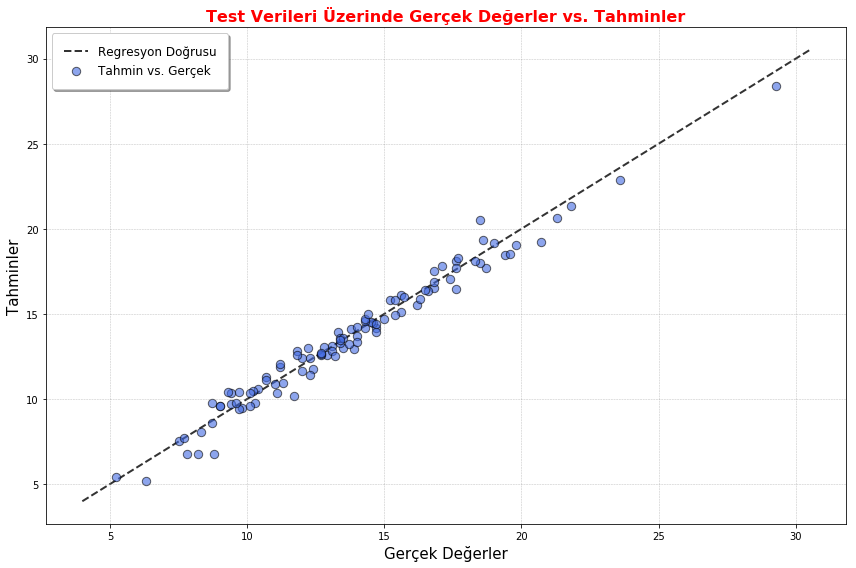

In [31]:
# Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 💡 Varsayım Kontrolleri
---

**Varsayımlar**

- 1- Tahmin hataları tesadüfidir ve Normal Dağılım gösterirler,

- 2- Tahmin hataları birbirlerinden bağımsızdır, yani hata terimleri arasında oto-korelasyon yoktur,

- 3- Her bağımsız değişkenin değerlerine ait olan bağımlı değişken değerlerinin al setlerinin 
varyansları birbirine eşittir,

- 4- Multi-Collinearity.

In [32]:
# Tahmin hataları tesadüfidir ve Normal Dağılım gösterirler
residuals = y_test - y_tahmin
statistik, p_degeri = shapiro(residuals)

print('Test İstatistiği =', statistik, ', p-değeri =', p_degeri)

# p-değeri anlamlılık düzeyine göre karar verilir
anlamlilik_duzey = 0.05
if p_degeri > anlamlilik_duzey:
    print('Normal bir dağılıma sahiptir (H0 reddedilemez)')
else:
    print('Normal bir dağılıma sahip değildir (H0 reddedilir)')

Test İstatistiği = 0.991821825504303 , p-değeri = 0.7932416796684265
Normal bir dağılıma sahiptir (H0 reddedilemez)


In [34]:
# Tahmin hataları birbirlerinden bağımsızdır, yani hata terimleri arasında oto-korelasyon yoktur
dw_test = durbin_watson(residuals)

print(f"Durbin-Watson İstatistiği: {dw_test:.4f}")

if dw_test < 1.5:
    print("Sonuç, pozitif otokorelasyona işaret ediyor. (Düşük değerler, pozitif otokorelasyonu gösterir.)")
elif dw_test > 2.5:
    print("Sonuç, negatif otokorelasyona işaret ediyor. (Yüksek değerler, negatif otokorelasyonu gösterir.)")
else:
    print("Sonuç, hata terimleri arasında önemli bir otokorelasyon olmadığını gösteriyor. (2'ye yakın değerler, otokorelasyonun olmadığını gösterir.)")


Durbin-Watson İstatistiği: 2.0640
Sonuç, hata terimleri arasında önemli bir otokorelasyon olmadığını gösteriyor. (2'ye yakın değerler, otokorelasyonun olmadığını gösterir.)


In [39]:
#  Her bağımsız değişkenin değerlerine ait olan bağımlı değişken değerlerinin al setlerinin varyansları birbirine eşittir,
y_tahmin = model_sklearn.predict(X_train)
hatalar = y_train - y_tahmin
stat, p = levene(y_train, hatalar)

print(f"Levene testi istatistiği: {stat}, p-değeri: {p}")

if p > 0.05:
    print("Hatalar arasında varyans homojenliği (sabit varyans) varsayımı ihlal edilmemiştir.")
else:
    print("Hatalar arasında varyans homojenliği (sabit varyans) varsayımı ihlal edilmiştir.")

Levene testi istatistiği: 232.71006624852973, p-değeri: 4.590117164211497e-43
Hatalar arasında varyans homojenliği (sabit varyans) varsayımı ihlal edilmiştir.


In [33]:
# Multi-Collinearity
X_const = add_constant(X_train)  
vif = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("VIF Değerleri:")
sikintili_degiskenler = []
for i, v in enumerate(vif):
    print(f"Gözlem {i}: {v:.2f}")
    if v >= 5:
        sikintili_degiskenler.append((i, v))

if sikintili_degiskenler:
    print("\nYüksek VIF değerlerine sahip sıkıntılı değişkenler:")
    for degisken in sikintili_degiskenler:
        print(f"Gözlem {degisken[0]}: VIF={degisken[1]:.2f}")
    print("\nBu değişkenler modelde yüksek çoklu doğrusallık yaratıyor ve analize olumsuz etki edebilir.")
else:
    print("\nModelde önemli bir çoklu doğrusallık sorunu görünmüyor.")

VIF Değerleri:
Gözlem 0: 9586.04
Gözlem 1: 1.25
Gözlem 2: 3.01
Gözlem 3: 11.60
Gözlem 4: 16.06
Gözlem 5: 390.62
Gözlem 6: 877.72
Gözlem 7: 2224.06
Gözlem 8: 10.03
Gözlem 9: 1.51
Gözlem 10: 2.44
Gözlem 11: 7.46
Gözlem 12: 5.25
Gözlem 13: 27.44
Gözlem 14: 8.50
Gözlem 15: 2330.49
Gözlem 16: 651.30
Gözlem 17: 4299.41
Gözlem 18: 1.36

Yüksek VIF değerlerine sahip sıkıntılı değişkenler:
Gözlem 0: VIF=9586.04
Gözlem 3: VIF=11.60
Gözlem 4: VIF=16.06
Gözlem 5: VIF=390.62
Gözlem 6: VIF=877.72
Gözlem 7: VIF=2224.06
Gözlem 8: VIF=10.03
Gözlem 11: VIF=7.46
Gözlem 12: VIF=5.25
Gözlem 13: VIF=27.44
Gözlem 14: VIF=8.50
Gözlem 15: VIF=2330.49
Gözlem 16: VIF=651.30
Gözlem 17: VIF=4299.41

Bu değişkenler modelde yüksek çoklu doğrusallık yaratıyor ve analize olumsuz etki edebilir.


**Çıkarımlar**

---
- Model genel olarak normal dağılım, otokorelasyon ve homoskedastisite varsayımlarını karşılıyor, bu da modelin bu yönlerden sağlam olduğunu gösteriyor.
---
- Ancak, çoklu doğrusallık sorunu modelimin güvenilirliğini ve yorumlanabilirliğini olumsuz etkileyebilir. Bu sorunu çözmek için, yüksek VIF değerlerine sahip değişkenleri modelden çıkarabilir, birleştirebilir veya regresyon modelinde düzenlileştirme tekniklerini (örneğin, Ridge veya Lasso regresyonu) kullanabilir.
---
- Modelimi iyileştirmek için, değişken seçimi yaparken adım adım geriye eleme, ileri seçim veya her ikisinin kombinasyonu gibi değişken seçimi yöntemlerini de düşünebilir.
---
- Yüksek VIF değerlerine sahip değişkenleri daha detaylı incelemek ve bu değişkenlerin modelin rolü üzerine daha fazla analiz yapılması gerekilir.

---
### 📉 Temel Bileşenler Regresyonu (PCR)
---

In [40]:
# K-Fold Cross Validation
cv = KFold(n_splits = 10, shuffle = True, random_state = 53)

In [41]:
pca = PCA()
X_egitim_scaled = pca.fit_transform(scale(X_train))

In [42]:
# Çapraz Doğrulama Skorlarının Hesaplanması
model = LinearRegression()
scr = []
for i in np.arange(1,19):
    scr_i = -1*model_selection.cross_val_score(model, X_egitim_scaled[:, :i],
                                              y_train, cv = cv,
                                              scoring = 'neg_mean_squared_error').mean()
    scr.append(scr_i)
    
scr_df = pd.DataFrame(scr, columns=['MSE'], index=np.arange(1, 19))
print(scr_df)

            MSE
1         5.761
2         5.372
3         5.373
4         5.266
5         4.986
6         8.326
7         2.466
8        16.644
9        42.359
10       13.877
11       14.873
12        0.474
13        0.521
14        8.430
15       57.321
16  2095954.598
17 45488700.515
18        0.439


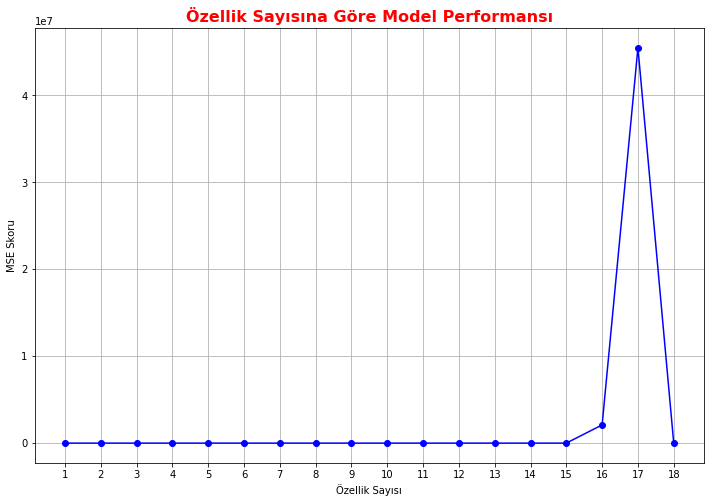

In [44]:
# Skorların Görselleştirilmesi
plt.figure(figsize=(12, 8)) 
plt.plot(np.arange(1, 19), scr, marker='o', linestyle='-', color='b')
plt.title('Özellik Sayısına Göre Model Performansı', fontsize=16, fontweight='bold', color='red')  
plt.xlabel('Özellik Sayısı') 
plt.ylabel('MSE Skoru') 
plt.grid(True)  
plt.xticks(np.arange(1, 19))  
plt.show()  

In [45]:
# Açıklanan Varyans Skorları
explained_variance_ratio = np.round(pca.explained_variance_ratio_, decimals=4) * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance, columns=['Kümülatif Açıklanan Varyans (%)'])
cumulative_explained_variance_df.index += 1 

print(cumulative_explained_variance_df)

    Kümülatif Açıklanan Varyans (%)
1                            27.860
2                            51.320
3                            61.510
4                            69.070
5                            75.710
6                            81.060
7                            85.590
8                            89.890
9                            92.990
10                           95.180
11                           96.910
12                           98.050
13                           99.020
14                           99.700
15                           99.910
16                          100.000
17                          100.000
18                          100.000


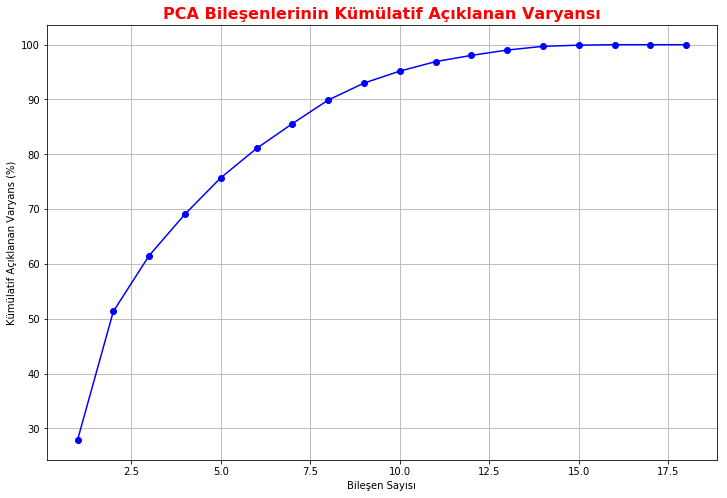

In [46]:
# Kümülatif Açıklanan Varyansın Grafiği
plt.figure(figsize=(12, 8))
plt.plot(cumulative_explained_variance_df, marker='o', linestyle='-', color='blue')
plt.title('PCA Bileşenlerinin Kümülatif Açıklanan Varyansı', fontsize=16, fontweight='bold', color='red')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Kümülatif Açıklanan Varyans (%)')
plt.grid(True)
plt.show()

In [47]:
# Optimum Modele Ulaşma
model2 = LinearRegression()
model_pca = model2.fit(X_egitim_scaled[:, :12], y_train)
yhat = model_pca.predict(X_egitim_scaled[:, :12])
r2_in_pca = r2_score(y_train, yhat)
mse_in_pca = mean_squared_error(y_train, yhat)

print(f"PCA sonrası uygulanan lineer regresyon modelinin eğitim veri seti üzerindeki R^2 skoru: {r2_in_pca:.4f}")
print(f"PCA sonrası uygulanan lineer regresyon modelinin eğitim veri seti üzerindeki MSE değeri: {mse_in_pca:.4f}")

PCA sonrası uygulanan lineer regresyon modelinin eğitim veri seti üzerindeki R^2 skoru: 0.9798
PCA sonrası uygulanan lineer regresyon modelinin eğitim veri seti üzerindeki MSE değeri: 0.3576


In [48]:
# Out-Of-Sample Prediction
X_test_scaled = pca.fit_transform(scale(X_test))
model_pca = model2.fit(X_egitim_scaled[:, :12], y_train)
yhat2 = model_pca.predict(X_test_scaled[:, :12])

r2_out_pca = r2_score(y_test, yhat2)
mse_out_pca = mean_squared_error(y_test, yhat2)

print(f"PCA sonrası uygulanan lineer regresyon modelinin test veri seti üzerindeki R^2 skoru: {r2_out_pca:.4f}")
print(f"PCA sonrası uygulanan lineer regresyon modelinin test veri seti üzerindeki MSE değeri: {mse_out_pca:.4f}")

PCA sonrası uygulanan lineer regresyon modelinin test veri seti üzerindeki R^2 skoru: 0.5634
PCA sonrası uygulanan lineer regresyon modelinin test veri seti üzerindeki MSE değeri: 6.8273


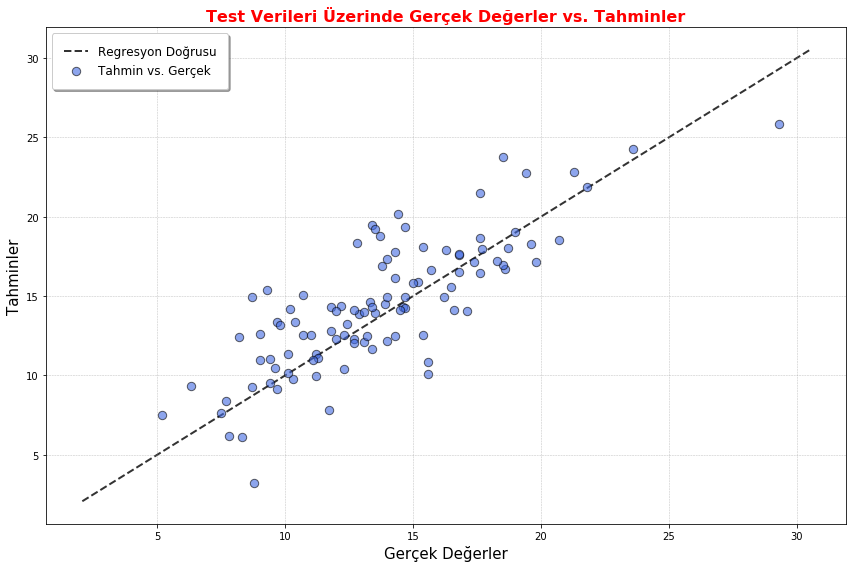

In [49]:
# Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, yhat2, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 📈Kısmi En Küçük Kareler Regresyonu (PLS)
---

In [50]:
# PLS Modeli
pls_model_5 = PLSRegression(n_components = 5).fit(X_train, y_train)

# Tahminler
y_hat_5 = pls_model_5.predict(X_train)
y_tahmin_5 = pls_model_5.predict(X_test)

In [51]:
# Hata Metrikleri
print(f"PLS Regresyonu Eğitim Veri Seti R2 Skoru: {r2_score(y_train, y_hat_5):.4f}")
print(f"PLS Regresyonu Test Veri Seti R2 Skoru: {r2_score(y_test, y_tahmin_5):.4f}")
print(f"PLS Regresyonu Test Veri Seti Ortalama Kare Hatası (MSE): {mean_squared_error(y_test, y_tahmin_5):.4f}")
print(f"PLS Regresyonu Eğitim Veri Seti Ortalama Kare Hatası (MSE): {mean_squared_error(y_train, y_hat_5):.4f}")

PLS Regresyonu Eğitim Veri Seti R2 Skoru: 0.9783
PLS Regresyonu Test Veri Seti R2 Skoru: 0.9738
PLS Regresyonu Test Veri Seti Ortalama Kare Hatası (MSE): 0.4096
PLS Regresyonu Eğitim Veri Seti Ortalama Kare Hatası (MSE): 0.3853


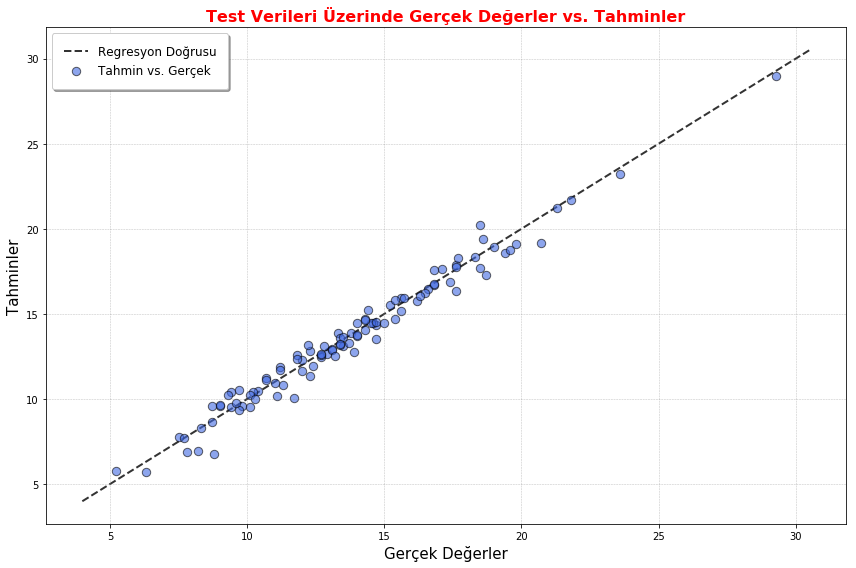

In [52]:
# Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_5, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [53]:
# Optimum PLS Skor Sayısının Belirlenmesi için Yapılacak Optimizasyon 
def optimum_pls_component(x, y, ncomp):
    model = PLSRegression(n_components = ncomp)
    cv_step = cross_val_predict(model, x, y, cv = 10)
    rscore = r2_score(y, cv_step)
    mse = mean_squared_error(y, cv_step)
    return(cv_step, rscore, mse)

In [54]:
rscore_sonuc = []
mse_sonuc = []
for i in np.arange(1,17):
    cv_step, rscore, mse = optimum_pls_component(X_train, y_train, i)
    rscore_sonuc.append(rscore)
    mse_sonuc.append(mse)
    
optimal_r2_index = np.argmax(rscore_sonuc) + 1 
optimal_mse_index = np.argmin(mse_sonuc) + 1

print("PLS Bileşen Sayısına Göre R2 ve MSE Skorları:")
for i, (rscore, mse) in enumerate(zip(rscore_sonuc, mse_sonuc), 1):
    print(f"Bileşen Sayısı = {i}: R2 Skoru = {rscore:.4f}, MSE = {mse:.4f}")

print("-" * 100)
print(f"\nEn optimal R2 skoru için bileşen sayısı = {optimal_r2_index}: R2 Skoru = {rscore_sonuc[optimal_r2_index-1]:.4f}")
print(f"En düşük MSE için bileşen sayısı = {optimal_mse_index}: MSE = {mse_sonuc[optimal_mse_index-1]:.4f}")

PLS Bileşen Sayısına Göre R2 ve MSE Skorları:
Bileşen Sayısı = 1: R2 Skoru = 0.7881, MSE = 3.7595
Bileşen Sayısı = 2: R2 Skoru = 0.9425, MSE = 1.0209
Bileşen Sayısı = 3: R2 Skoru = 0.9595, MSE = 0.7181
Bileşen Sayısı = 4: R2 Skoru = 0.9711, MSE = 0.5133
Bileşen Sayısı = 5: R2 Skoru = 0.9753, MSE = 0.4389
Bileşen Sayısı = 6: R2 Skoru = 0.9758, MSE = 0.4287
Bileşen Sayısı = 7: R2 Skoru = 0.9763, MSE = 0.4209
Bileşen Sayısı = 8: R2 Skoru = 0.9762, MSE = 0.4229
Bileşen Sayısı = 9: R2 Skoru = 0.9762, MSE = 0.4226
Bileşen Sayısı = 10: R2 Skoru = 0.9759, MSE = 0.4272
Bileşen Sayısı = 11: R2 Skoru = 0.9758, MSE = 0.4288
Bileşen Sayısı = 12: R2 Skoru = 0.9757, MSE = 0.4306
Bileşen Sayısı = 13: R2 Skoru = 0.9758, MSE = 0.4292
Bileşen Sayısı = 14: R2 Skoru = 0.9759, MSE = 0.4284
Bileşen Sayısı = 15: R2 Skoru = 0.9759, MSE = 0.4276
Bileşen Sayısı = 16: R2 Skoru = 0.9755, MSE = 0.4346
----------------------------------------------------------------------------------------------------

En optimal R2

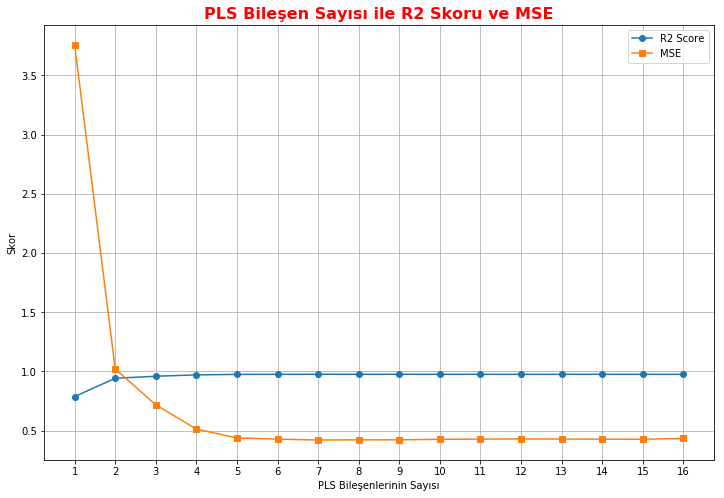

In [55]:
plt.figure(figsize=(12, 8))

plt.plot(np.arange(1, 17), rscore_sonuc, label='R2 Score', marker='o')
plt.plot(np.arange(1, 17), mse_sonuc, label='MSE', marker='s')

plt.title('PLS Bileşen Sayısı ile R2 Skoru ve MSE', color='red', fontsize=16, fontweight='bold')
plt.xlabel('PLS Bileşenlerinin Sayısı')
plt.ylabel('Skor')
plt.xticks(np.arange(1, 17))
plt.legend()
plt.grid(True)

plt.show()

In [56]:
# Optimum PLS Modeli
# PLS Modeli
pls_model_opt = PLSRegression(n_components = 7).fit(X_train, y_train)

# Tahminler
y_hat_opt = pls_model_opt.predict(X_train)
y_tahmin_opt = pls_model_opt.predict(X_test)

In [57]:
# Hata Metrikleri
print(f"Optimum PLS Regresyonu Eğitim Veri Seti R2 Skoru: {r2_score(y_train, y_hat_opt):.4f}")
print(f"Optimum PLS Regresyonu Test Veri Seti R2 Skoru: {r2_score(y_test, y_tahmin_opt):.4f}")
print(f"Optimum PLS Regresyonu Test Veri Seti Ortalama Kare Hatası (MSE): {mean_squared_error(y_test, y_tahmin_opt):.4f}")
print(f"Optimum PLS Regresyonu Eğitim Veri Seti Ortalama Kare Hatası (MSE): {mean_squared_error(y_train, y_hat_opt):.4f}")

Optimum PLS Regresyonu Eğitim Veri Seti R2 Skoru: 0.9798
Optimum PLS Regresyonu Test Veri Seti R2 Skoru: 0.9728
Optimum PLS Regresyonu Test Veri Seti Ortalama Kare Hatası (MSE): 0.4249
Optimum PLS Regresyonu Eğitim Veri Seti Ortalama Kare Hatası (MSE): 0.3586


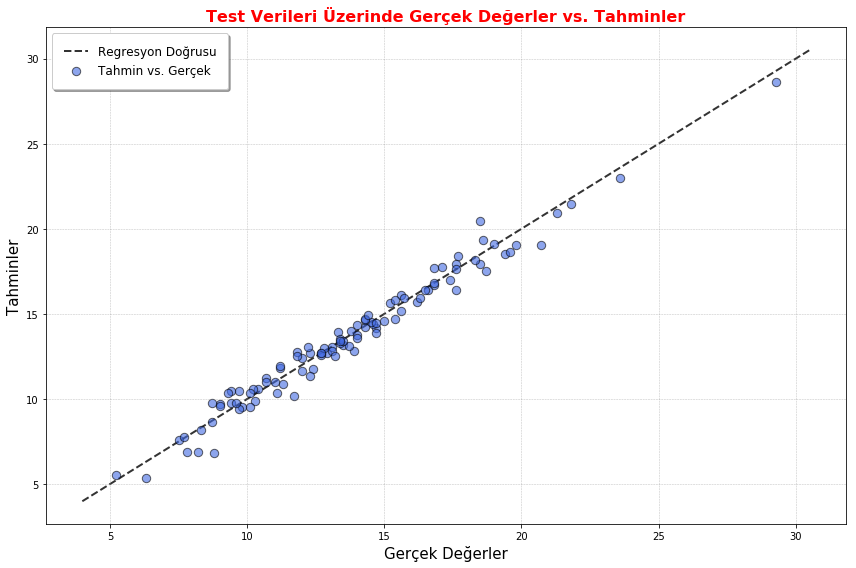

In [58]:
# Optimum Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_opt, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🧱Ridge Regresyon (Cezalandırcı)
---

In [59]:
# Ridge Model
model_ridge = Ridge(alpha = 0.2).fit(X_train, y_train)
coef = model_ridge.coef_

feature_names = X_train.columns
coef_df = pd.DataFrame(coef, index=feature_names, columns=['Katsayılar'])

print(coef_df)

         Katsayılar
Age           0.015
Games        -0.006
Minutes       0.000
TS            2.317
ORB           0.135
DRB           0.134
TRB          -0.015
AST           0.082
STL           0.994
BLK           0.537
TOV          -0.038
USG           0.459
ORtg          0.209
DRtg          0.010
OWS          -0.668
DWS          -0.944
WS            0.972
Outlier      -0.103


In [60]:
y_tahmin_ridge_2 = model_ridge.predict(X_test)

r2_02 = r2_score(y_test, y_tahmin_ridge_2)
mse_02 = mean_squared_error(y_test, y_tahmin_ridge_2)

print(f"Ridge Regresyon Modeli R2_02 Skoru: {r2_02:.4f}")
print(f"Ridge Regresyon Modeli Ortalama Kare Hatası (MSE)_02: {mse_02:.4f}")

Ridge Regresyon Modeli R2_02 Skoru: 0.9730
Ridge Regresyon Modeli Ortalama Kare Hatası (MSE)_02: 0.4220


In [61]:
lambda_degerleri = np.array([0.0001, 0.005, 0.01, 0.1, 0.2, 0.5, 1, 5, 10])
# Optimum Lambda, R^2, MSE
def optimum_lambda_ve_mse(x, y, lambda_degerleri):
    model_sonuclari = []
    for lmb in lambda_degerleri:
        model = Ridge(alpha=lmb)
        cv_step = cross_val_predict(model, x, y, cv=10)
        rscore = r2_score(y, cv_step)
        mse = mean_squared_error(y, cv_step)
        model_sonuclari.append((lmb, rscore, mse))
    return model_sonuclari

model_sonuclari = optimum_lambda_ve_mse(X_train, y_train, lambda_degerleri)

optimum_lambda, _, optimum_mse = min(model_sonuclari, key=lambda x: x[2])
optimum_rscore = [rscore for lmb, rscore, mse in model_sonuclari if lmb == optimum_lambda][0]

for lmb, rscore, mse in model_sonuclari:
    print(f"Lambda = {lmb}: R2 Skoru = {rscore:.4f}, MSE = {mse:.4f}")

print(f"\nOptimum Lambda = {optimum_lambda}: Optimum R2 Skoru = {optimum_rscore:.4f}, Optimum MSE = {optimum_mse:.4f}")

Lambda = 0.0001: R2 Skoru = 0.9756, MSE = 0.4325
Lambda = 0.005: R2 Skoru = 0.9757, MSE = 0.4312
Lambda = 0.01: R2 Skoru = 0.9757, MSE = 0.4316
Lambda = 0.1: R2 Skoru = 0.9746, MSE = 0.4504
Lambda = 0.2: R2 Skoru = 0.9742, MSE = 0.4574
Lambda = 0.5: R2 Skoru = 0.9739, MSE = 0.4636
Lambda = 1.0: R2 Skoru = 0.9737, MSE = 0.4658
Lambda = 5.0: R2 Skoru = 0.9736, MSE = 0.4684
Lambda = 10.0: R2 Skoru = 0.9733, MSE = 0.4738

Optimum Lambda = 0.005: Optimum R2 Skoru = 0.9757, Optimum MSE = 0.4312


In [62]:
# Optimum Ridge Regresyonu
model_ridge_opt = Ridge(alpha = 0.005).fit(X_train, y_train)

In [63]:
y_tahmin_ridge_opt = model_ridge_opt.predict(X_test)

r2_opt = r2_score(y_test, y_tahmin_ridge_opt)
mse_opt = mean_squared_error(y_test, y_tahmin_ridge_opt)

print(f"Optimum Ridge Regresyon Modeli R2_02 Skoru: {r2_opt:.4f}")
print(f"Optimum Ridge Regresyon Modeli Ortalama Kare Hatası (MSE)_02: {mse_opt:.4f}")

Optimum Ridge Regresyon Modeli R2_02 Skoru: 0.9724
Optimum Ridge Regresyon Modeli Ortalama Kare Hatası (MSE)_02: 0.4318


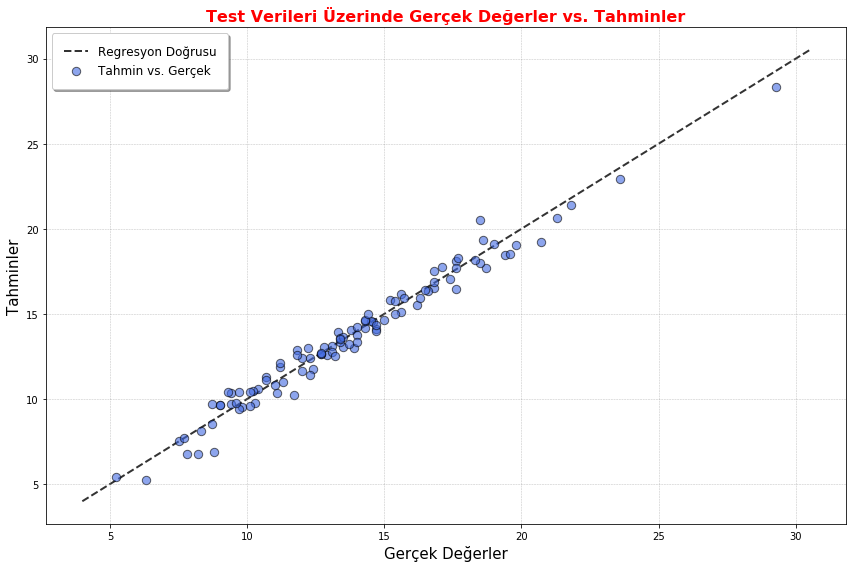

In [64]:
# Optimum Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_ridge_opt, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 📈Lasso Regresyon
---

In [65]:
# Lasso Model
model_lasso = Lasso(alpha = 0.2).fit(X_train, y_train)
coef = model_lasso.coef_

feature_names = X_train.columns
coef_df = pd.DataFrame(coef, index=feature_names, columns=['Katsayılar'])

print(coef_df)

         Katsayılar
Age          -0.000
Games        -0.014
Minutes       0.000
TS            0.000
ORB           0.100
DRB           0.137
TRB           0.000
AST           0.079
STL           0.186
BLK           0.305
TOV           0.000
USG           0.464
ORtg          0.250
DRtg         -0.005
OWS           0.000
DWS           0.000
WS            0.173
Outlier      -0.000


In [66]:
y_tahmin_lasso_2 = model_lasso.predict(X_test)

r2_02 = r2_score(y_test, y_tahmin_ridge_2)
mse_02 = mean_squared_error(y_test, y_tahmin_ridge_2)

print(f"Lasso Regresyon Modeli R2_02 Skoru: {r2_02:.4f}")
print(f"Lasso Regresyon Modeli Ortalama Kare Hatası (MSE)_02: {mse_02:.4f}")

Lasso Regresyon Modeli R2_02 Skoru: 0.9730
Lasso Regresyon Modeli Ortalama Kare Hatası (MSE)_02: 0.4220


In [67]:
# Model Optimazyonu
model_lasso_cv = LassoCV(cv = 10, random_state=1, max_iter = 1000)
model_lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=1, selection='cyclic',
    tol=0.0001, verbose=False)

In [68]:
opt_alpha = model_lasso_cv.alpha_
print(f"Optimum Alpha: {opt_alpha}")

optimum_model_lasso = Lasso(alpha=opt_alpha).fit(X_train, y_train)
y_tahmin_opt = optimum_model_lasso.predict(X_test)

r2_opt = r2_score(y_test, y_tahmin_opt)
mse_opt = mean_squared_error(y_test, y_tahmin_opt)

print(f"Optimum Lasso Modeli R2 Skoru: {r2_opt:.4f}")
print(f"Optimum Lasso Modeli MSE: {mse_opt:.4f}")

Optimum Alpha: 1.7110933772167858
Optimum Lasso Modeli R2 Skoru: 0.9071
Optimum Lasso Modeli MSE: 1.4535


In [69]:
# Optimum Model
model_lasso_opt = Lasso(alpha =  1.7110933772167858).fit(X_train, y_train)
y_tahmin_lasso_opt = model_lasso_opt.predict(X_test)

r2__opt = r2_score(y_test, y_tahmin_opt)
mse__opt = mean_squared_error(y_test, y_tahmin_opt)

print(f"Lasso Regresyon Modeli R2_02 Skoru: {r2__opt:.4f}")
print(f"Lasso Regresyon Modeli Ortalama Kare Hatası (MSE)_02: {mse__opt:.4f}")

Lasso Regresyon Modeli R2_02 Skoru: 0.9071
Lasso Regresyon Modeli Ortalama Kare Hatası (MSE)_02: 1.4535


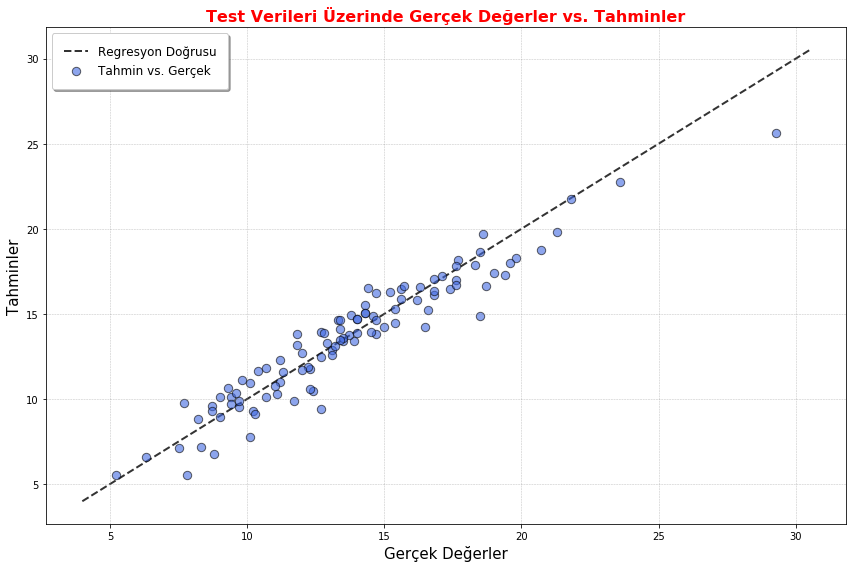

In [70]:
# Optimum Tahminler
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_lasso_opt, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### ❓ ElasticNet Regresyonu
---

In [71]:
# Model
elastic_net_model = ElasticNet(random_state=53)
elastic_net_model.fit(X_train, y_train)
y_pred = elastic_net_model.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred)
r2_elastic = r2_score(y_test, y_pred)

print("ElasticNet Regresyon Modeli Performansı:")
print("-" * 40)
print("Ortalama Kareler Hatası (MSE): {:.4f}".format(mse_elastic))
print("R^2 Skoru: {:.4f}".format(r2_elastic))

ElasticNet Regresyon Modeli Performansı:
----------------------------------------
Ortalama Kareler Hatası (MSE): 1.0174
R^2 Skoru: 0.9349


In [127]:
# Optimum alpha ve lambda Değeri
elastic_net_cv = ElasticNetCV(cv=10, random_state=53)
elastic_net_cv.fit(X_train, y_train)

optimum_alpha = elastic_net_cv.alpha_
optimum_l1_ratio = elastic_net_cv.l1_ratio_

y_pred_opt = elastic_net_cv.predict(X_test)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2_opt_elastic = r2_score(y_test, y_pred_opt)
mse_opt_elastic = mean_squared_error(y_test, y_pred_opt)

print("ElasticNet Regresyon Modeli Optimum Parametreler ile Performansı:")
print("-" * 60)
print("Optimum Alpha (α) Değeri: {:.4f}".format(optimum_alpha))
print("Optimum L1 Ratio (λ) Değeri: {:.4f}".format(optimum_l1_ratio))
print("Ortalama Kareler Hatası ElasticNet_cv (MSE): {:.4f}".format(mse_opt))
print("R^2 Skoru ElasticNet_cv: {:.4f}".format(r2_opt_elastic))
print("MSE Skoru ElasticNet_cv: {:.4f}".format(mse_opt_elastic))

ElasticNet Regresyon Modeli Optimum Parametreler ile Performansı:
------------------------------------------------------------
Optimum Alpha (α) Değeri: 3.4222
Optimum L1 Ratio (λ) Değeri: 0.5000
Ortalama Kareler Hatası ElasticNet_cv (MSE): 1.5761
R^2 Skoru ElasticNet_cv: 0.8992
MSE Skoru ElasticNet_cv: 1.5761


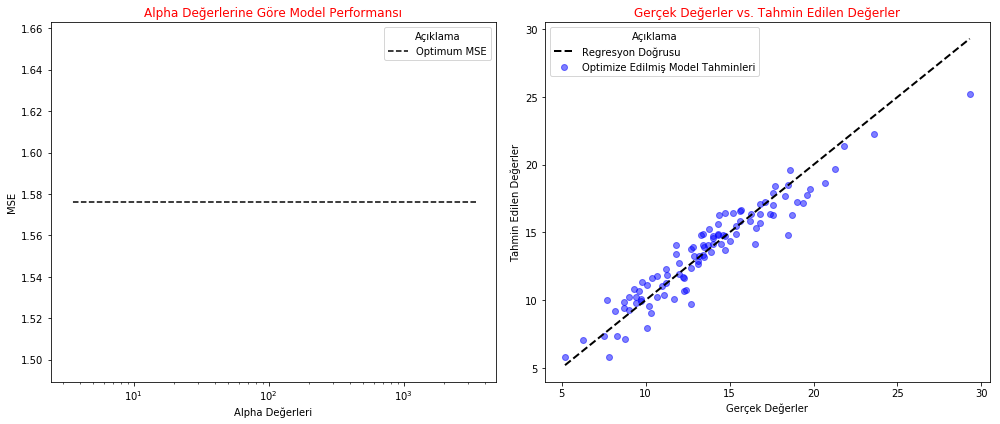

In [73]:
# Gerçek Değerler ile Tahmin Edilen Değerlerin Karşılaştırılması
alphas = elastic_net_cv.alphas_
l1_ratios = elastic_net_cv.l1_ratio_
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Optimum alpha değerini görselleştirme
ax[0].plot(alphas, [mse_opt] * len(alphas), 'k--', label='Optimum MSE')
ax[0].set_xscale('log')
ax[0].set_xlabel('Alpha Değerleri')
ax[0].set_ylabel('MSE')
ax[0].set_title('Alpha Değerlerine Göre Model Performansı', color = 'red')
ax[0].legend(loc='best', title='Açıklama')

# Gerçek değerler ile tahmin edilen değerleri karşılaştırma
ax[1].scatter(y_test, y_pred_opt, alpha=0.5, color='blue', label='Optimize Edilmiş Model Tahminleri')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Regresyon Doğrusu')
ax[1].set_xlabel('Gerçek Değerler')
ax[1].set_ylabel('Tahmin Edilen Değerler')
ax[1].set_title('Gerçek Değerler vs. Tahmin Edilen Değerler', color = 'red')
ax[1].legend(loc='best', title='Açıklama')

plt.tight_layout()
plt.show()

---
### 🤝 KNN Regresyonu 
---

In [74]:
# KNN Model
KNN_model = KNeighborsRegressor().fit(X_train, y_train)
print(f"KNN Modelinin Komşu Sayısı: {KNN_model.n_neighbors}")

KNN Modelinin Komşu Sayısı: 5


In [75]:
y_hat_5 = KNN_model.predict(X_train)
y_hat_5_tahmin = KNN_model.predict(X_test)

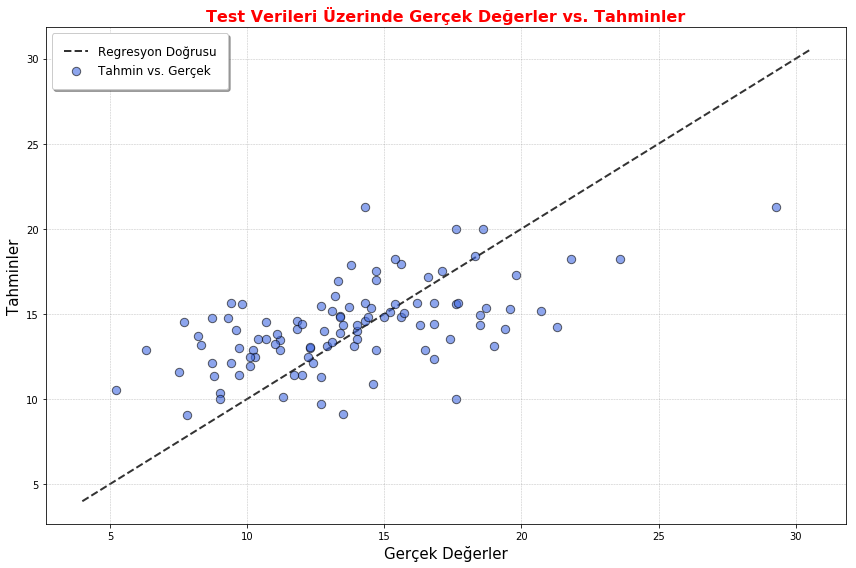

In [76]:
# K = 5 İçin
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_hat_5_tahmin, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [77]:
r2_egitim_knn5 = r2_score(y_train, y_hat_5)
r2_test_knn5 = r2_score(y_test, y_hat_5_tahmin)
mse_egitim_knn5 = mean_squared_error(y_train, y_hat_5)
mse_test_knn5 = mean_squared_error(y_test, y_hat_5_tahmin)

print(f"Default KNN Eğitim Veri Seti R2 Skoru: {r2_egitim_knn5:.4f}")
print(f"Default KNN Test Veri Seti R2 Skoru: {r2_test_knn5:.4f}")
print(f"Default KNN Eğitim Veri Seti MSE: {mse_egitim_knn5:.4f}")
print(f"Default KNN Test Veri Seti MSE: {mse_test_knn5:.4f}")


Default KNN Eğitim Veri Seti R2 Skoru: 0.5039
Default KNN Test Veri Seti R2 Skoru: 0.3042
Default KNN Eğitim Veri Seti MSE: 8.8019
Default KNN Test Veri Seti MSE: 10.8819


In [78]:
# Model Optimizasyonu
mse_degerleri = []
r2_degerleri = []

for k in range(15):
    k = k + 1
    KNN_model_k = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_hat_k = KNN_model_k.predict(X_train)
    r2_k = r2_score(y_train, y_hat_k)
    mse_k = mean_squared_error(y_train, y_hat_k)
    r2_degerleri.append(r2_k)
    mse_degerleri.append(mse_k)
    

print("K Değerine Göre Eğitim Veri Setinin R2 ve MSE Skorları:")
for k, (r2, mse) in enumerate(zip(r2_degerleri, mse_degerleri), 1):
    print(f"K = {k}: R2 Skoru = {r2:.4f}, MSE = {mse:.4f}")


K Değerine Göre Eğitim Veri Setinin R2 ve MSE Skorları:
K = 1: R2 Skoru = 1.0000, MSE = 0.0000
K = 2: R2 Skoru = 0.7692, MSE = 4.0955
K = 3: R2 Skoru = 0.6312, MSE = 6.5447
K = 4: R2 Skoru = 0.5549, MSE = 7.8971
K = 5: R2 Skoru = 0.5039, MSE = 8.8019
K = 6: R2 Skoru = 0.4589, MSE = 9.6016
K = 7: R2 Skoru = 0.4392, MSE = 9.9513
K = 8: R2 Skoru = 0.4313, MSE = 10.0911
K = 9: R2 Skoru = 0.4008, MSE = 10.6328
K = 10: R2 Skoru = 0.3868, MSE = 10.8808
K = 11: R2 Skoru = 0.3732, MSE = 11.1212
K = 12: R2 Skoru = 0.3701, MSE = 11.1770
K = 13: R2 Skoru = 0.3571, MSE = 11.4079
K = 14: R2 Skoru = 0.3510, MSE = 11.5158
K = 15: R2 Skoru = 0.3476, MSE = 11.5757


In [79]:
# Grid Search ile Optimum K'nın Belirlenmesi
KNN_model_gs = KNeighborsRegressor()
aday_k = {"n_neighbors": [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
KNN_model_grid = GridSearchCV(KNN_model_gs, aday_k, cv = 10)
KNN_model_grid.fit(X_train, y_train)


print(f"Grid Search ile Bulunan En İyi K Değeri: {KNN_model_grid.best_params_['n_neighbors']}")

Grid Search ile Bulunan En İyi K Değeri: 13


In [80]:
KNN_model_opt = KNeighborsRegressor(n_neighbors=13).fit(X_train, y_train)
y_hat_13 = KNN_model_opt.predict(X_train)
y_hat_13_tahmin = KNN_model_opt.predict(X_test)


r2_test_knnopt = r2_score(y_test, y_hat_13_tahmin)
mse_test_knnopt = mean_squared_error(y_test, y_hat_13_tahmin)

print(f"Optimum KNN Test Veri Seti R2 Skoru: {r2_test_knnopt:.4f}")
print(f"Optimum KNN Test Veri Seti MSE: {mse_test_knnopt:.4f}")


Optimum KNN Test Veri Seti R2 Skoru: 0.2365
Optimum KNN Test Veri Seti MSE: 11.9393


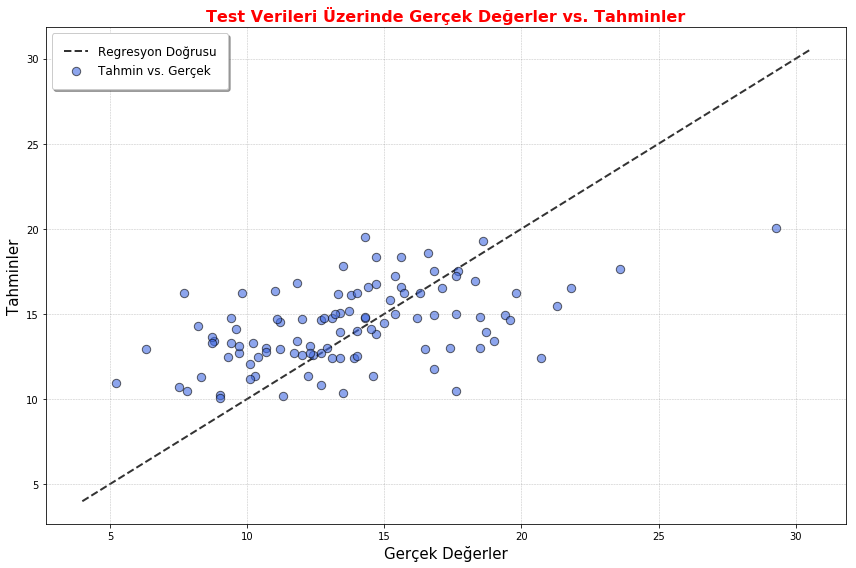

In [81]:
# Optimum Model 
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_hat_13_tahmin, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🎯 Support Vector Machine (Karar Destek Vektörleri) 
--- 

In [121]:
# Doğrusal Model
SVR_model_dogrusal = SVR(kernel="linear").fit(X_train, y_train)
y_hat = SVR_model_dogrusal.predict(X_train)
y_tahmin = SVR_model_dogrusal.predict(X_test)

# R2 ve MSE skorları
r2_test = r2_score(y_test, y_tahmin)
mse_test = mean_squared_error(y_test, y_tahmin)

print(f"Doğrusal SVR Modeli Test Veri Seti R2 Skoru: {r2_test:.4f}")
print(f"Doğrusal SVR Modeli Test Veri Seti için MSE Skoru: {mse_test:.4f}")

Doğrusal SVR Modeli Test Veri Seti R2 Skoru: 0.9557
Doğrusal SVR Modeli Test Veri Seti için MSE Skoru: 0.6920


In [122]:
# Doğrusal Olmayan Model
SVR_model_nn = SVR(kernel = "rbf").fit(X_train, y_train)
y_hat_nn = SVR_model_nn.predict(X_train)
y_tahmin_nn = SVR_model_nn.predict(X_test)

# Doğrusal olmayan model için ve Test veri setlerinin R2 ve MSE skorları
r2_test_nn = r2_score(y_test, y_tahmin_nn)
mse_test_nn = mean_squared_error(y_test, y_tahmin_nn)

print(f"Doğrusal Olmayan SVR Modeli Test Veri Seti R2 Skoru: {r2_test_nn:.4f}")
print(f"Doğrusal Olmayan SVR Modeli Test Veri Seti için MSE Skoru: {mse_test_nn:.4f}")

Doğrusal Olmayan SVR Modeli Test Veri Seti R2 Skoru: -0.0043
Doğrusal Olmayan SVR Modeli Test Veri Seti için MSE Skoru: 15.7057


In [123]:
# Model Optimizasyonu
parametreler = {'C': np.arange(0.1, 2, 0.4)}
SVR_l_model = GridSearchCV(SVR_model_dogrusal, parametreler, cv=10).fit(X_train, y_train)
SVR_nl_model = GridSearchCV(SVR_model_nn, parametreler, cv=10).fit(X_train, y_train)

print(f"Lineer SVR Modeli için En İyi Parametre: {SVR_l_model.best_params_}")
print(f"Doğrusal Olmayan SVR Modeli için En İyi Parametre: {SVR_nl_model.best_params_}")

Lineer SVR Modeli için En İyi Parametre: {'C': 0.1}
Doğrusal Olmayan SVR Modeli için En İyi Parametre: {'C': 1.7000000000000002}


In [124]:
y_tahmin_l_best = SVR_l_model.predict(X_test)
y_tahmin_nl_best = SVR_nl_model.predict(X_test)

SVR_r2_l_best = r2_score(y_test, y_tahmin_l_best)
SVR_mse_l_best = mean_squared_error(y_test, y_tahmin_l_best)

SVR_r2_nl_best = r2_score(y_test, y_tahmin_nl_best)
SVR_mse_nl_best = mean_squared_error(y_test, y_tahmin_nl_best)

print(f"En İyi Lineer SVR Modeli Test Veri Seti R2 Skoru: {SVR_r2_l_best:.4f}, MSE: {SVR_mse_l_best:.4f}")
print(f"En İyi Doğrusal Olmayan SVR Modeli Test Veri Seti R2 Skoru: {SVR_r2_nl_best:.4f}, MSE: {SVR_mse_nl_best:.4f}")

En İyi Lineer SVR Modeli Test Veri Seti R2 Skoru: 0.9720, MSE: 0.4377
En İyi Doğrusal Olmayan SVR Modeli Test Veri Seti R2 Skoru: -0.0072, MSE: 15.7514


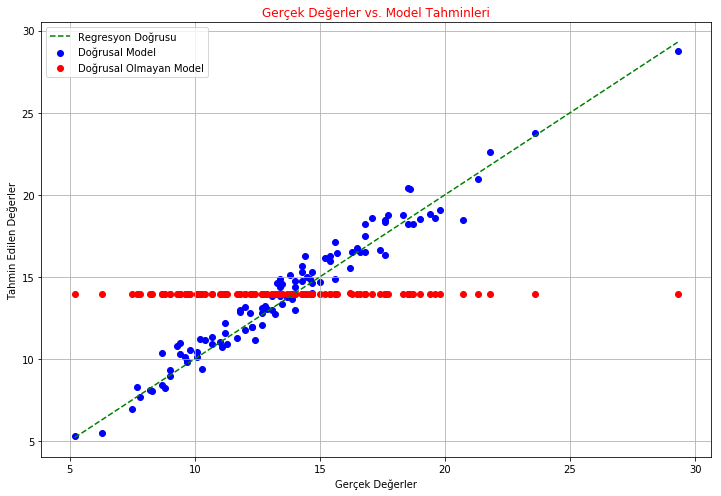

In [125]:
plt.figure(figsize=(12, 8))

# Doğrusal model için scatter plot
plt.scatter(y_test, y_tahmin, color='blue', label='Doğrusal Model')
# Doğrusal olmayan model için scatter plot
plt.scatter(y_test, y_tahmin_nn, color='red', label='Doğrusal Olmayan Model')
ideal_x = np.linspace(min(y_test), max(y_test), len(y_test))
plt.plot(ideal_x, ideal_x, color='green', linestyle='--', label='Regresyon Doğrusu')

plt.title('Gerçek Değerler vs. Model Tahminleri', color = 'red')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.grid(True)
plt.show()

---
### 💻 Yapay Sinir Ağları (Artificial Neural Network, ANN) 
---

In [112]:
# Model
scl = StandardScaler()
scl.fit(X_train)
X_egitim_scale = scl.transform(X_train)
X_test_scale = scl.transform(X_test)

In [113]:
ysa_modeli =  MLPRegressor().fit(X_egitim_scale, y_train)

print("Model Mimarisi:")
print(f"Modeldeki katman sayısı: {ysa_modeli.n_layers_}")
print(f"Gizli katmanların boyutu: {ysa_modeli.hidden_layer_sizes}")

Model Mimarisi:
Modeldeki katman sayısı: 3
Gizli katmanların boyutu: (100,)


In [114]:
y_tahmin = ysa_modeli.predict(X_test_scale)

r2_ysa = r2_score(y_test, y_tahmin)
mse_ysa = mean_squared_error(y_test, y_tahmin)

print(f"ANN Modeli R2 Skoru: {r2_ysa:.4f}")
print(f"ANN Modeli MSE: {mse_ysa:.4f}")

ANN Modeli R2 Skoru: 0.3103
ANN Modeli MSE: 10.7862


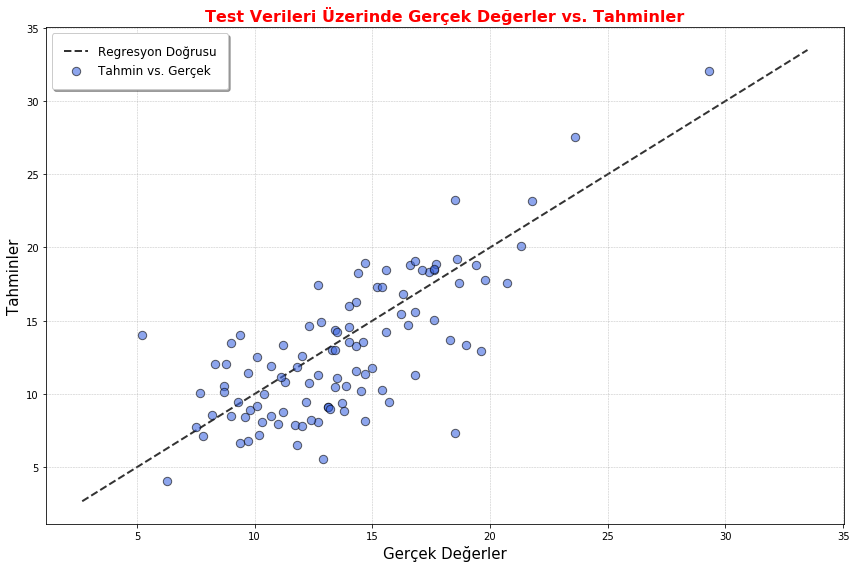

In [115]:
# Deafult Model Grafik
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [116]:
# Model Optimizasyonu
parametreler = {"alpha": [0.1, 0.01, 0.02, 0.005],
               "hidden_layer_sizes": [(20,20), (100, 25, 150), (250, 100, 200)],
               "activation": ["relu", "logistic"]}

gs_ann_model = GridSearchCV(ysa_modeli, parametreler, cv = 5)
gs_ann_model.fit(X_egitim_scale, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.01, 0.02, 0.005], 'hidden_layer_sizes': [(20, 20), (100, 25, 150), (250, 100, 200)], 'activation': ['relu', 'logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
print(f"Yapay Sinir Ağları Modeli için En İyi Parametreler: {gs_ann_model.best_params_}")

Yapay Sinir Ağları Modeli için En İyi Parametreler: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (250, 100, 200)}


In [118]:
# Optimum Model
best_ann_model = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (250, 100, 200), 
                              activation = "relu").fit(X_egitim_scale, y_train)

In [119]:
best_tahmin = best_ann_model.predict(X_test_scale)

best_r2 = r2_score(y_test, best_tahmin)
best_mse = mean_squared_error(y_test, best_tahmin)

print(f"En İyi ANN Modeli R2 Skoru: {best_r2:.4f}")
print(f"En İyi ANN Modeli MSE: {best_mse:.4f}")

En İyi ANN Modeli R2 Skoru: 0.9172
En İyi ANN Modeli MSE: 1.2941


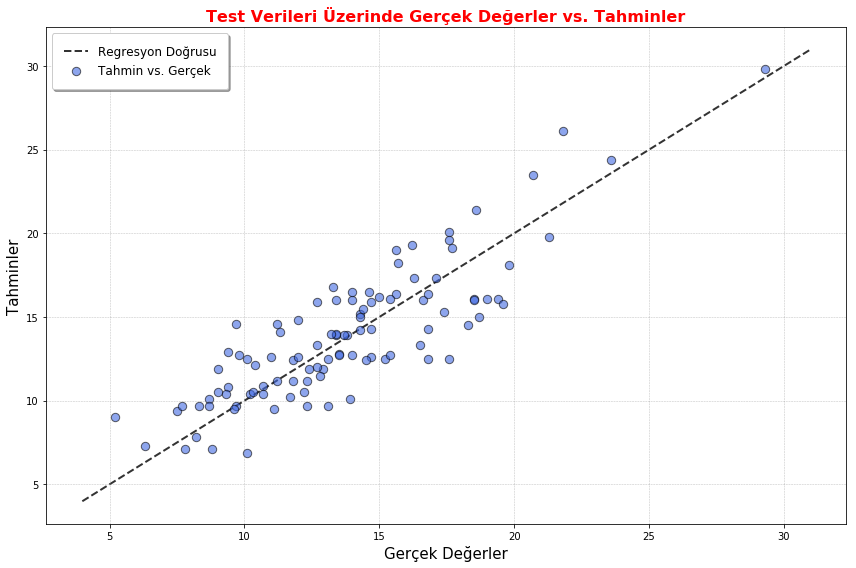

In [120]:
y_true_ann = y_test  
y_pred_ann = best_tahmin
# Optimum
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin0, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🌳Karar Ağaçları
---

In [107]:
# Cart Uygulaması, default 
cart_model0 = DecisionTreeRegressor().fit(X_train, y_train)
y_tahmin0 = cart_model0.predict(X_test)
r2_skoru_default = r2_score(y_test, y_tahmin0)
mse_default  = mean_squared_error(y_test, y_tahmin0)

print(f"Karar Ağacı Default R^2 Skoru: {r2_skoru_default:.4f}")
print(f"Karar Ağacı Default (Ortalama Kare Hata): {mse_default:.4f}")

Karar Ağacı Default R^2 Skoru: 0.6996
Karar Ağacı Default (Ortalama Kare Hata): 4.6972


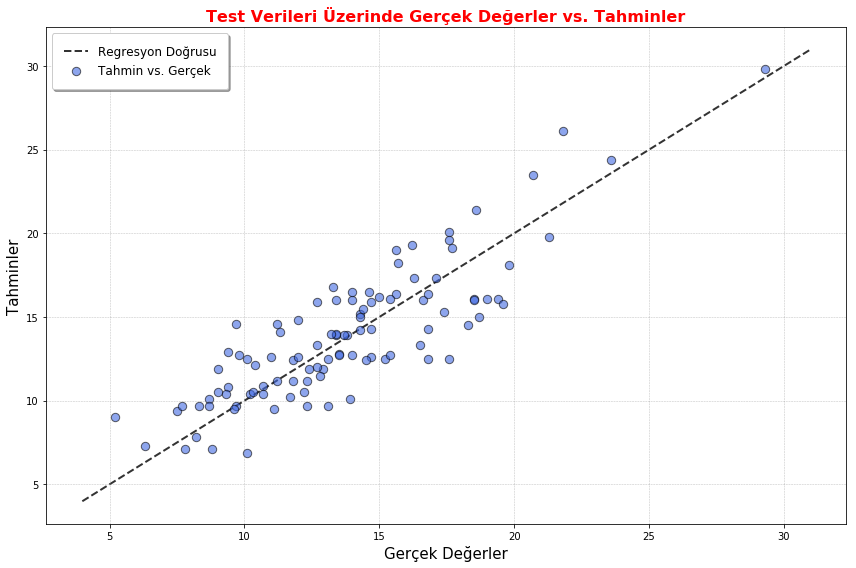

In [108]:
# Default Model Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin0, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [109]:
# Model Optimizasyonu
parametreler = {
    "min_samples_split": range(2, 100),  
    "max_leaf_nodes": range(2, 10)  
}

GS_cart = GridSearchCV(cart_model0, parametreler, cv = 10).fit(X_train, y_train)
print("En iyi parametreler:", GS_cart.best_params_)

En iyi parametreler: {'max_leaf_nodes': 9, 'min_samples_split': 40}


In [110]:
# Optimizasyon Sonucunda Elde Edilen En İyi Parametrelerle Modelin Oluşturulması
optim_cart = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=40).fit(X_train, y_train)
y_tahmin_optim = optim_cart.predict(X_test)

r2_skoru_optimcart = r2_score(y_test, y_tahmin_optim)
mse_degeri_optimcart = mean_squared_error(y_test, y_tahmin_optim)

print(f"Optimum Karar Ağacı Modeli R^2 Skoru: {r2_skoru_optimcart:.4f}")
print(f"Optimum Karar Ağacı Modeli MSE Değeri: {mse_degeri_optimcart:.4f}")

Optimum Karar Ağacı Modeli R^2 Skoru: 0.6762
Optimum Karar Ağacı Modeli MSE Değeri: 5.0637


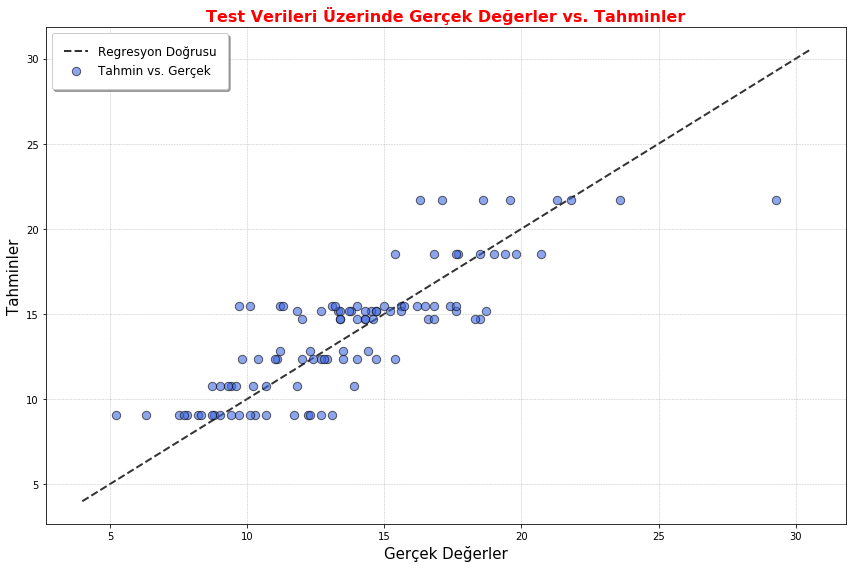

In [111]:
# Optimum Model Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_optim, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🧾Bagging 
---

In [101]:
# Bagging default 
bag_model0 = BaggingRegressor(bootstrap=True).fit(X_train, y_train)
y_tahmin_bag = bag_model0.predict(X_test)
r2_skoru_default = r2_score(y_test, y_tahmin0)
mse_default = mean_squared_error(y_test, y_tahmin0)

print(f"Bagging Default Modeli R^2 Skoru: {r2_skoru_default:.4f}")
print(f"Bagging Default Modeli MSE (Ortalama Kare Hata): {mse_default:.4f}")

Bagging Default Modeli R^2 Skoru: 0.8830
Bagging Default Modeli MSE (Ortalama Kare Hata): 1.8294


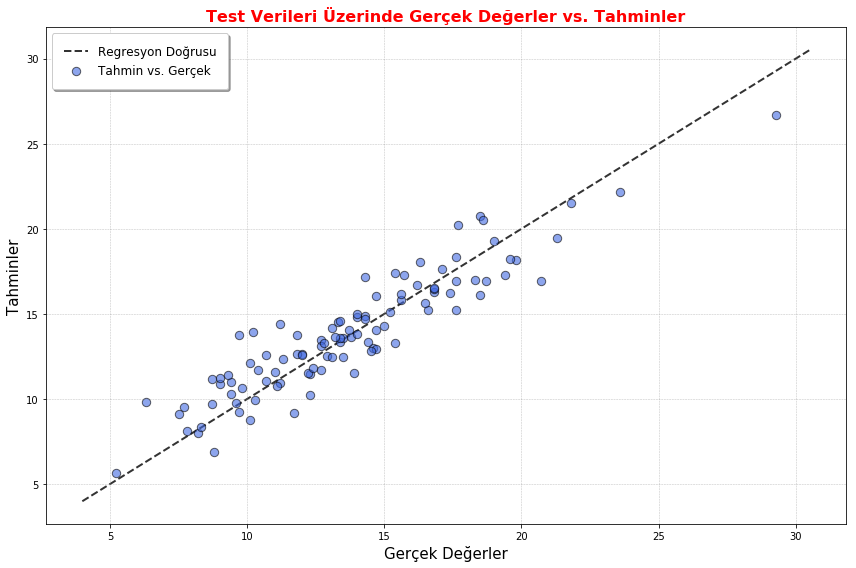

In [102]:
# Bagging default  Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_bag, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [103]:
bag_params = {"n_estimators": range(2,100)}
GS_bag = GridSearchCV(bag_model0, bag_params, cv = 10).fit(X_train, y_train)
best_params = GS_bag.best_params_
print("Bagging Regressor için En İyi Parametreler:")
print(best_params)

Bagging Regressor için En İyi Parametreler:
{'n_estimators': 85}


In [105]:
# Optimizasyon Sonucunda Elde Edilen En İyi Parametrelerle Modelin Oluşturulması
best_bag = BaggingRegressor(n_estimators=85).fit(X_train, y_train)
y_tahmin_best_bag = best_bag.predict(X_test)

r2_skoru_optimbag = r2_score(y_test, y_tahmin_best_bag)
mse_degeri_optimbag = mean_squared_error(y_test, y_tahmin_best_bag)

print(f"Optimum Bagging Modeli R^2 Skoru: {r2_skoru_optimbag:.4f}")
print(f"Optimum Bagging Modeli MSE Değeri: {mse_degeri_optimbag:.4f}")

Optimum Bagging Modeli R^2 Skoru: 0.8673
Optimum Bagging Modeli MSE Değeri: 2.0745


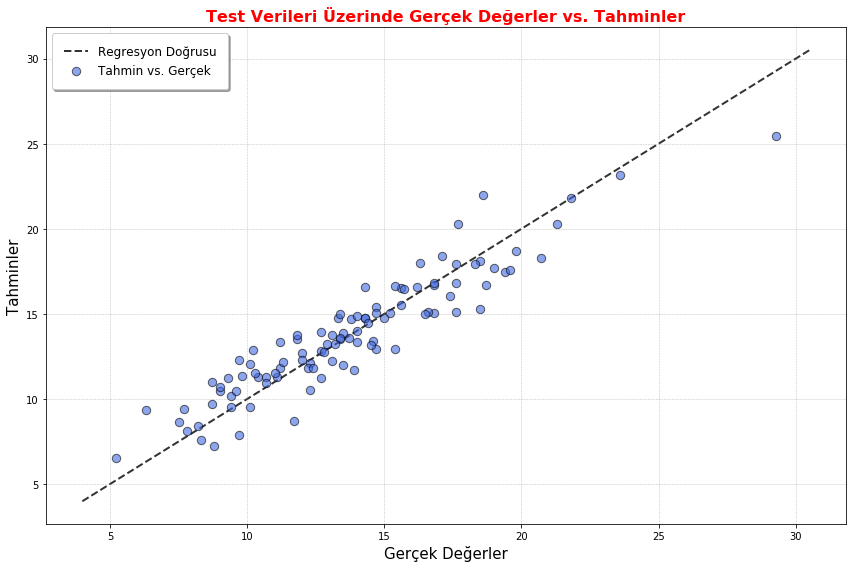

In [106]:
# Bagging Optimum Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_best_bag, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🍃 Random Forest
---

In [94]:
# Random Forest default
rf_model0 = RandomForestRegressor().fit(X_train, y_train)
y_tahmin_drf = rf_model0.predict(X_test)
r2_skoru_default = r2_score(y_test, y_tahmin_drf)
mse_default  = mean_squared_error(y_test, y_tahmin_drf)

print(f"Random Forest Default R^2 Skoru: {r2_skoru_default:.4f}")
print(f"Random Forest Default MSE (Ortalama Kare Hata): {mse_default:.4f}")

Random Forest Default R^2 Skoru: 0.8349
Random Forest Default MSE (Ortalama Kare Hata): 2.5814


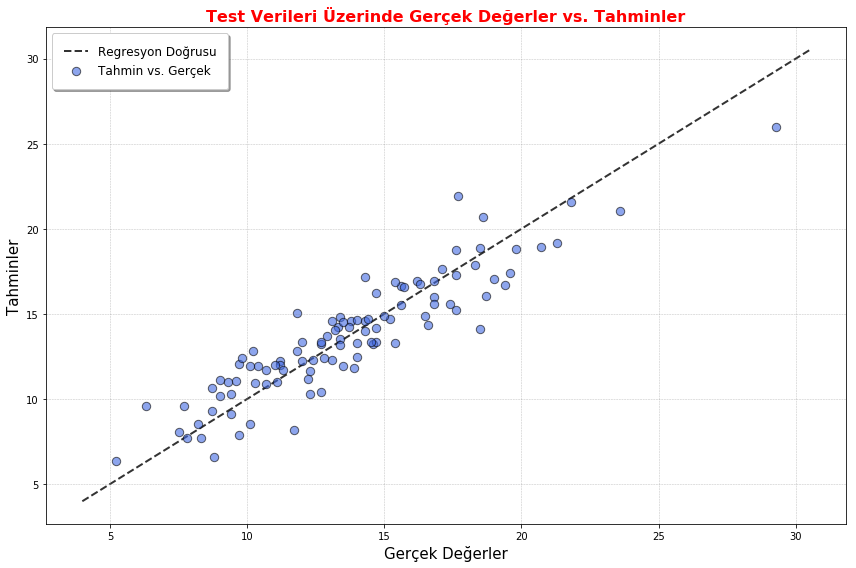

In [95]:
# Random Forest Default Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_drf, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [96]:
# Model Optimizasyonu
rf_params = {"max_depth": range(1,15), "max_features": [2,3,5,10,15],
             "n_estimators": [25, 50, 100, 200, 1000]}

In [97]:
GS_rf = GridSearchCV(rf_model0, rf_params, cv = 10).fit(X_train, y_train)
best_params = GS_rf.best_params_
print("Random Forest Regressor için En İyi Parametreler:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Random Forest Regressor için En İyi Parametreler:
max_depth: 13
max_features: 15
n_estimators: 100


In [99]:
# Optimum model
rf_optim = RandomForestRegressor(max_depth=13, max_features=15, n_estimators=100).fit(X_train, y_train)
y_pred_optim_rf = rf_optim.predict(X_test)

r2_opt_rf = r2_score(y_test, y_pred_optim_rf)
mse_opt_rf = mean_squared_error(y_test, y_pred_optim_rf)

print(f"Optimum Random Forest Modeli R^2 (R-squared) Değeri: {r2_opt_rf:.4f}")
print(f"Optimum Random Forest Modeli MSE (Ortalama Karesel Hata): {mse_opt_rf:.4f}")

Optimum Random Forest Modeli R^2 (R-squared) Değeri: 0.8698
Optimum Random Forest Modeli MSE (Ortalama Karesel Hata): 2.0357


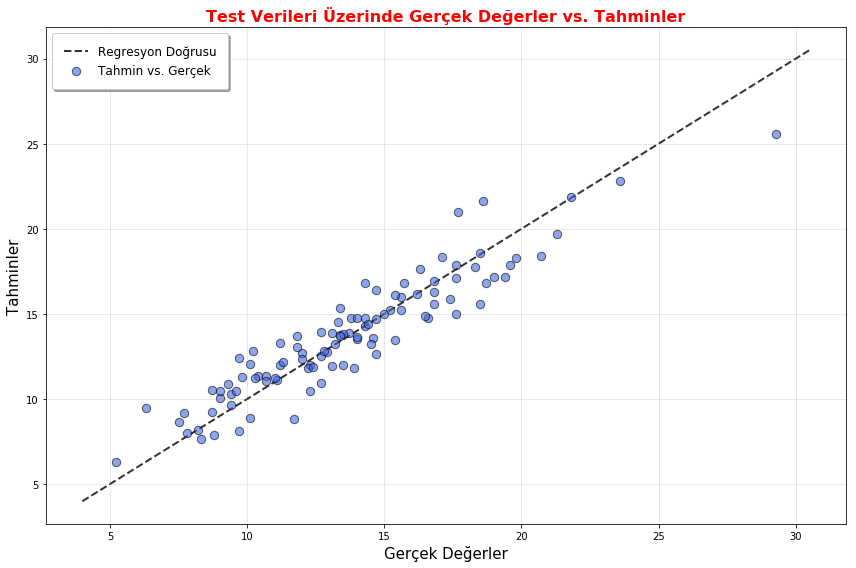

In [100]:
# Optimum Model 
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_optim_rf, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🌟 Gradient Boosting
--- 

In [87]:
# Gradient Boosting Machines default
gb_model0 = GradientBoostingRegressor().fit(X_train, y_train)
y_tahmin_gb_df = gb_model0.predict(X_test)
r2_skoru_default = r2_score(y_test, y_tahmin_gb_df)
mse_default  = mean_squared_error(y_test, y_tahmin_gb_df)

print(f"Default Gradient Boosting R^2 Skoru: {r2_skoru_default:.4f}")
print(f"Default Gradient Boosting MSE (Ortalama Kare Hata): {mse_default:.4f}")

Default Gradient Boosting R^2 Skoru: 0.8924
Default Gradient Boosting MSE (Ortalama Kare Hata): 1.6824


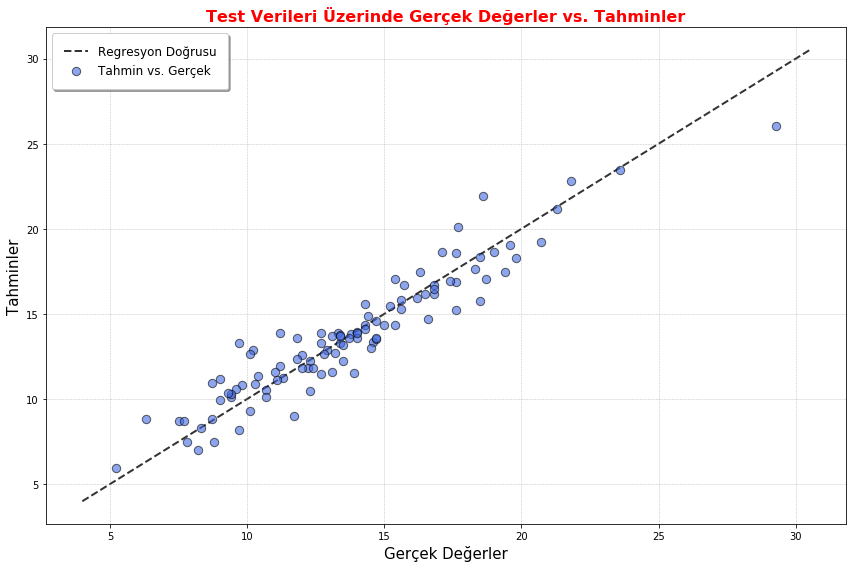

In [88]:
# Default Model Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_gb_df, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [89]:
# Model Optimizasyonu
gb_params = {
    "learning_rate": [0.001, 0.1, 0.2],
    "max_depth": [3, 5, 10],
    "n_estimators": [100, 500],
    "subsample": [0.5, 1]
}

In [90]:
GS_gb = GridSearchCV(gb_model0, gb_params, n_jobs=-1, cv=10).fit(X_train, y_train)
best_params = GS_gb.best_params_

print("Gradient Boosting Regressor için En İyi Parametreler:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Gradient Boosting Regressor için En İyi Parametreler:
learning_rate: 0.1
max_depth: 3
n_estimators: 500
subsample: 0.5


In [91]:
gb_best = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=500,
                                   subsample=0.5).fit(X_train, y_train)

In [92]:
y_tahmin_best_gb = gb_best.predict(X_test)

r2_opt_gb = r2_score(y_test, y_tahmin_best_gb)
mse_opt_gb = mean_squared_error(y_test, y_tahmin_best_gb)

print(f"Optimum Gradient Boosting Modeli R^2 (R-squared) Değeri: {r2_opt_gb:.4f}")
print(f"Optimum Gradient Boosting Modeli MSE (Ortalama Karesel Hata): {mse_opt_gb:.4f}")

Optimum Gradient Boosting Modeli R^2 (R-squared) Değeri: 0.9237
Optimum Gradient Boosting Modeli MSE (Ortalama Karesel Hata): 1.1936


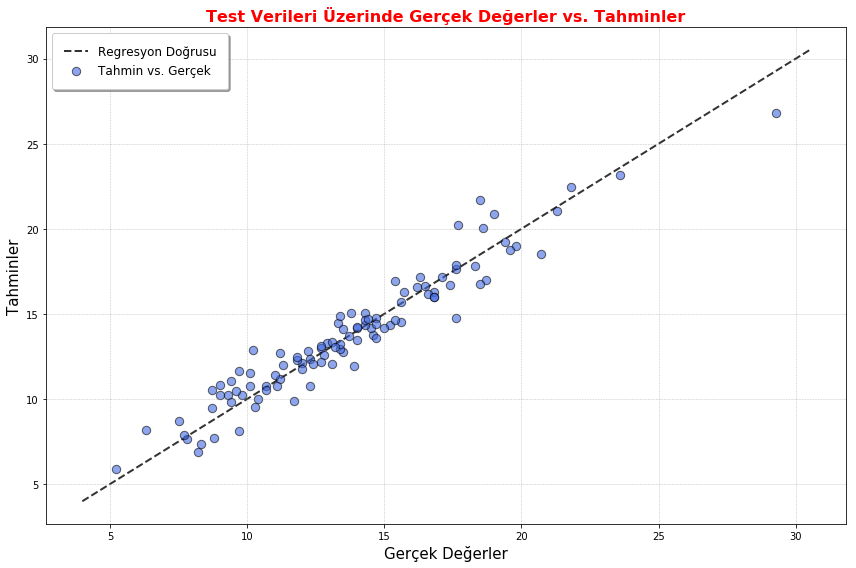

In [93]:
# Optimum Model Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_best_gb, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### ❌XGBoost
--- 

In [82]:
# XGBoost Default
xgb_model0 = XGBRegressor().fit(X_train, y_train)
y_tahmin0 = xgb_model0.predict(X_test)

r2_skoru_default = r2_score(y_test, y_tahmin0)
mse_default  = mean_squared_error(y_test, y_tahmin0)

print(f"XGBoost Default Modeli R^2 Skoru: {r2_skoru_default:.4f}")
print(f"XGBoost Default Modeli MSE (Ortalama Kare Hata): {mse_default:.4f}")

XGBoost Default Modeli R^2 Skoru: 0.8830
XGBoost Default Modeli MSE (Ortalama Kare Hata): 1.8294


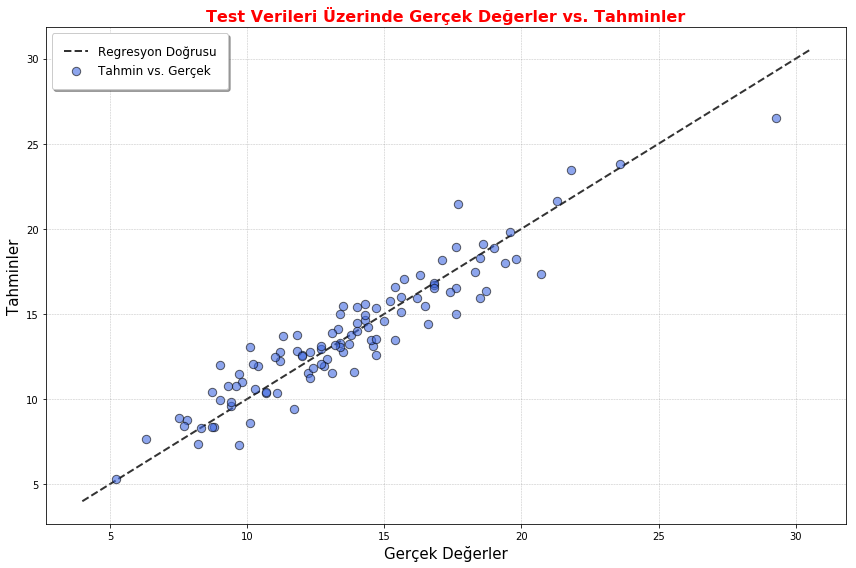

In [83]:
# Default Model Tahmin
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin0, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

In [84]:
# Model optimizasyonu
xgb_params = {"colsample_bytree":[0.2,0.6,1], "n_estimators":[100, 250, 500]}
GS_xgb = GridSearchCV(xgb_model0, xgb_params, cv = 10).fit(X_train, y_train)
best_params = GS_xgb.best_params_

for param, value in best_params.items():
    print(f"{param}: {value}")

colsample_bytree: 1
n_estimators: 100


In [85]:
# Optimum model
xgb_best = XGBRegressor(colsample_bytree = 1, n_estimators = 100).fit(
   X_train, y_train)
y_tahmin_xgb = xgb_best.predict(X_test)

r2_opt_xgb = r2_score(y_test, y_tahmin_xgb)
mse_opt_xgb = mean_squared_error(y_test, y_tahmin_xgb)

print(f"Optimum XGBoost Modeli R^2 (R-squared) Değeri: {r2_opt_xgb:.4f}")
print(f"Optimum XGBoost Modeli MSE (Ortalama Karesel Hata): {mse_opt_xgb:.4f}")

Optimum XGBoost Modeli R^2 (R-squared) Değeri: 0.8830
Optimum XGBoost Modeli MSE (Ortalama Karesel Hata): 1.8294


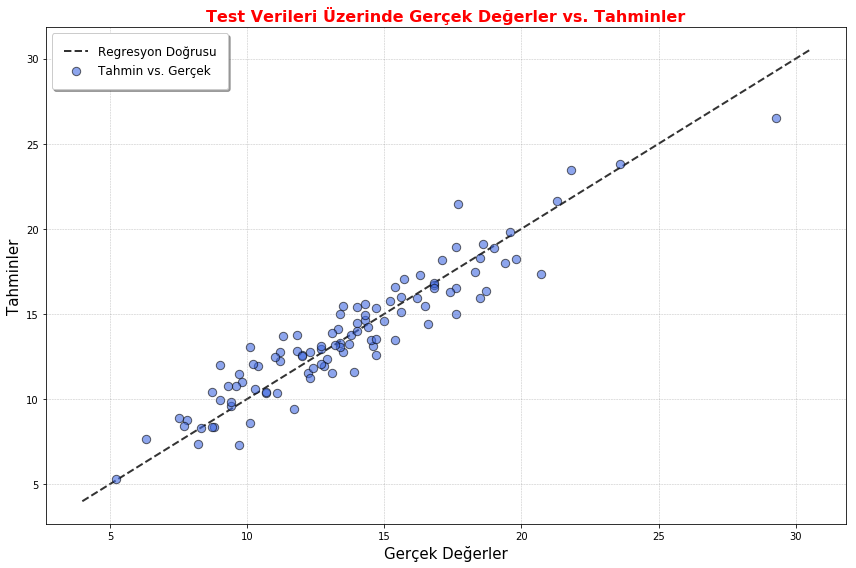

In [86]:
# Optimum Model Tahmin
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_tahmin_xgb, color="royalblue", alpha=0.6, edgecolor='black', s=70, label='Tahmin vs. Gerçek')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
lims = [min(xmin, ymin), max(xmax, ymax)]
plt.plot(lims, lims, 'k--', alpha=0.8, zorder=0, linewidth=2, label='Regresyon Doğrusu')
plt.xlabel('Gerçek Değerler', fontsize=15)
plt.ylabel('Tahminler', fontsize=15)
plt.title('Test Verileri Üzerinde Gerçek Değerler vs. Tahminler', fontsize=16, fontweight='bold', color='red')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(loc='upper left', fontsize=12, frameon=True, shadow=True, borderpad=1)

plt.tight_layout()
plt.show()

---
### 🤔Karar Aşaması
---

In [131]:
scores = {
    "Linear Regression": {"R^2 Score": r2_out_linear, "MSE": mse_out_linear},
    "PCA Linear Regression": {"R^2 Score": r2_out_pca, "MSE": mse_out_pca},
    "Optimum PLS Regression": {"R^2 Score": r2_score(y_test, y_tahmin_opt), "MSE": mean_squared_error(y_test, y_tahmin_opt)},
    "Optimum Ridge Regression": {"R^2 Score": r2_opt, "MSE": mse_opt},
    "Lasso Regression": {"R^2 Score": r2__opt, "MSE": mse__opt},
    "ElasticNet Regression": {"R^2 Score": r2_opt_elastic, "MSE": mse_opt_elastic},
    "Optimum KNN": {"R^2 Score": r2_test_knnopt, "MSE": mse_test_knnopt},
    "Best Linear SVR": {"R^2 Score": SVR_r2_l_best, "MSE": SVR_mse_l_best},
    "Best Non-Linear SVR": {"R^2 Score": SVR_r2_nl_best, "MSE": SVR_mse_nl_best},
    "Best ANN Model": {"R^2 Score": best_r2, "MSE": best_mse},
    "Optimum Decision Tree": {"R^2 Score": r2_skoru_optimcart, "MSE": mse_degeri_optimcart},
    "Optimum Bagging Model": {"R^2 Score": r2_skoru_optimbag, "MSE": mse_degeri_optimbag},
    "Optimum Random Forest": {"R^2 Score": r2_opt_rf, "MSE": mse_opt_rf},
    "Optimum Gradient Boosting": {"R^2 Score": r2_opt_gb, "MSE": mse_opt_gb},
    "Optimum XGBoost": {"R^2 Score": r2_opt_xgb, "MSE": mse_opt_xgb}
}

df_scores = pd.DataFrame(scores).T  
df_scores

,MSE,R^2 Score
Linear Regression,0.438,0.972
PCA Linear Regression,6.827,0.563
Optimum PLS Regression,1.453,0.907
Optimum Ridge Regression,1.576,0.899
Lasso Regression,1.453,0.907
ElasticNet Regression,1.576,0.899
Optimum KNN,11.939,0.237
Best Linear SVR,0.438,0.972
Best Non-Linear SVR,15.751,-0.007
Best ANN Model,1.294,0.917


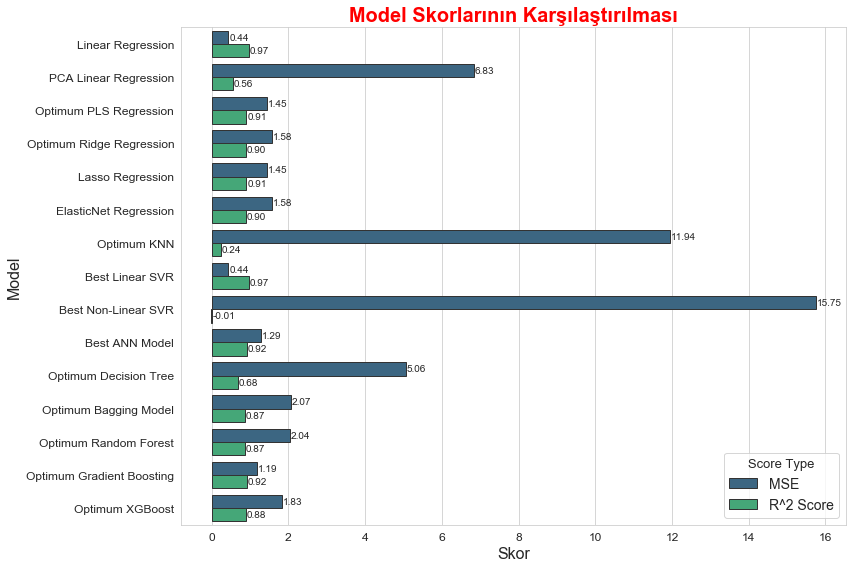

In [139]:
# Görselleştirme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Score', y='Model', hue='Score Type', data=df_melted, palette="viridis", edgecolor=".2")

for p in ax.patches:
    width = p.get_width()    
    plt.text(p.get_x() + width + 0.02,  
             p.get_y() + p.get_height() / 2,  
             '{:1.2f}'.format(width),  
             ha='left', 
             va='center') 

plt.title('Model Skorlarının Karşılaştırılması', fontsize=20, color ='red', fontweight='bold')
plt.xlabel('Skor', fontsize=16)
plt.ylabel('Model', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Score Type', fontsize=14, title_fontsize='13', loc='lower right')

plt.tight_layout()
plt.show()

Genel olarak, düşük bir MSE (Mean Squared Error) ve yüksek bir R² skoru, modelimin iyi performans gösterdiğini gösterir. Ancak, çoklu bağlantı problemim olduğunda, regresyon tabanlı modellerimin performansı olumsuz etkilenebilir. Bu durumda, bağımsız değişkenlerin katsayı tahminleri yüksek varyans gösterebilir.

Grafiğime bakıldığında, en düşük MSE'ye sahip modelimin "Best Non-Linear SVR" ve en yüksek R² skoruna sahip modelimin "Optimum XGBoost" olduğunu gözlemliyorum. Bu durum, veri setimin doğrusal olmayan modellerle daha iyi modelleme yapabileceğini gösteriyor olabilir. Hem "Best Non-Linear SVR" hem de "Optimum XGBoost", karmaşık ilişkileri yakalamada doğrusal modellere göre daha yetenekli.

Çoklu bağlantı sorunumu çözmek için Ridge ve Lasso regresyon gibi düzenlileştirme yöntemlerini kullandım. Bu yöntemlerle bazı değişkenlerin etkisini azaltmaya ve modelimin genel performansını iyileştirmeye çalıştım. Ancak, bu modellerin R² skorları nispeten düşük kaldı.

Sonuç olarak, veri setimdeki çoklu bağlantı sorununu hafifletmek ve model performansımı iyileştirmek için doğrusal olmayan modeller ve düzenlileştirme tekniklerinin etkili olduğunu gördüm. Optimum XGBoost modelimin yüksek R² skoru, veri setim için en uygun model olabileceğini işaret ediyor. Yine de, model seçimi ve değerlendirme yaparken, sadece bu iki metriğe göre karar vermek yerine, modelin kararlılığı, yorumlanabilirliği ve iş problemime uygunluğu gibi diğer faktörleri de dikkate alıyorum.
